In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Read Data

In [ ]:
train = pd.read_csv('../Dataset/FitbitTrainData.csv')
test = pd.read_csv('../Dataset/FitbitTestData.csv')

In [3]:
len(train.columns)

30

In [4]:
train.tail()

Total_MET  Avg_METs  TrackerDistance  TotalDistance  DistancePerStep  \
652  -1.397714 -1.608051        -1.390970      -1.388368        -3.144916   
653  -0.750854 -0.895610        -0.966176      -0.965692         0.124253   
654   0.117053  0.060288         0.445640       0.439085         0.641043   
655   0.279625  0.239342         0.453137       0.446544         0.585242   
656  -0.297623 -0.396429        -0.503900      -0.505721         0.062609   

     StepsbyDistance  TotalActiveDistance  TotalSteps  TotalActiveMinutes  \
652        -3.142781            -1.373895   -1.490262           -1.887682   
653         0.427647            -0.953921   -1.006334           -0.501349   
654        -0.059723             0.442680    0.316416            0.497141   
655        -0.013602             0.462561    0.350928            0.175314   
656         0.496265            -0.491701   -0.460285           -0.072246   

     ActiveRatio  ...  AveragePace  ActiveGroup  VeryActiveRatio  \
652    -1.887682  ...    -1.707441    -1.144195        -0.621244   
653    -0.501349  ...    -0.921719    -1.144195        -0.621244   
654     0.497141  ...     0.267340     0.215183        -0.466584   
655     0.175314  ...     0.584723     0.215183        -0.288096   
656    -0.072246  ...    -0.454487    -0.464506        -0.621244   

     VeryActiveDistance  FairlyActiveRatio  ActiveDistanceRatio  \
652           -0.574141          -0.662279            -3.134234   
653           -0.574141          -0.365947             0.311237   
654           -0.384923           0.967547             0.312762   
655           -0.349222           1.152949             0.336320   
656           -0.574141          -0.662279             0.331624   

     FairlyActiveMinutes  TotalUsageMinutes  ModeratelyActiveDistance  \
652            -0.686709           0.824493                 -0.648415   
653            -0.295113           0.824493                 -0.261947   
654             1.467071           0.824493                  1.593096   
655             1.222323          -0.264938                  1.195587   
656            -0.686709           0.824493                 -0.648415   

     Calories  
652      1347  
653      1529  
654      3012  
655      2899  
656      1827  

[5 rows x 30 columns]

In [5]:
test.tail()

Total_MET  Avg_METs  TrackerDistance  TotalDistance  DistancePerStep  \
277  -0.674601 -0.811627        -0.813749      -0.814026         0.385365   
278  -1.148180 -1.333219        -1.131096      -1.129790         0.198067   
279   0.014455 -0.052712        -0.039125      -0.043263         0.173523   
280  -0.001609 -0.070405        -0.466418      -0.468426         0.483143   
281  -0.687024 -0.825309        -0.806253      -0.806567         0.710408   

     StepsbyDistance  TotalActiveDistance  TotalSteps  TotalActiveMinutes  \
277         0.163566            -0.799848   -0.881326           -0.897444   
278         0.348811            -1.115450   -1.200749           -1.491587   
279         0.374636            -0.029480    0.026903            0.158810   
280         0.074458            -0.454425   -0.541195           -0.765412   
281        -0.115193            -0.792392   -0.925424           -0.889192   

     ActiveRatio  ...  AveragePace  ActiveGroup  VeryActiveRatio  \
277    -0.897444  ...    -0.212720    -1.144195        -0.621244   
278    -1.491587  ...    -0.025071    -1.144195        -0.621244   
279     0.158810  ...    -0.013591     0.215183        -0.002606   
280    -0.765412  ...     0.405037    -1.144195         0.284618   
281    -0.889192  ...    -0.205822    -1.144195        -0.621244   

     VeryActiveDistance  FairlyActiveRatio  ActiveDistanceRatio  \
277           -0.574141          -0.662279             0.331624   
278           -0.574141          -0.662279             0.331624   
279            0.197010          -0.402989             0.331624   
280            0.114897          -0.069615             0.331624   
281           -0.574141          -0.662279             0.331624   

     FairlyActiveMinutes  TotalUsageMinutes  ModeratelyActiveDistance  \
277            -0.686709           0.353888                 -0.648415   
278            -0.686709           0.824493                 -0.648415   
279            -0.344062           0.824493                 -0.272989   
280             0.096483           0.824493                 -0.295073   
281            -0.686709          -1.172798                 -0.648415   

     Calories  
277      2498  
278      2229  
279      1835  
280      2643  
281      2660  

[5 rows x 30 columns]

# Robust Scaler

In [6]:
# from sklearn.preprocessing import RobustScaler

# # Inisialisasi RobustScaler
# robust_scaler = RobustScaler()

# # Tentukan kolom yang akan diskalakan (semua kolom kecuali 'Calories')
# col_to_scale = [col for col in train.columns if col != "Calories"]

# # Fit scaler pada data pelatihan dan transformasi
# train[col_to_scale] = robust_scaler.fit_transform(train[col_to_scale])

# # Transformasi data pengujian dengan scaler yang sama
# test[col_to_scale] = robust_scaler.transform(test[col_to_scale])

# Ambil test, masukin ke train supaya 8:2

In [8]:
new_train_df = train.copy()

train_size = int(0.8 * (len(train) + len(test)))
test_size = len(train) + len(test) - train_size

num_to_move = train_size - len(train)

new_train_df = pd.concat([new_train_df, test[:num_to_move]])  # Ambil data dari test
new_test_df = test[num_to_move:]


In [9]:
print("Ukuran train:", train.shape)
print("Ukuran test:", test.shape)

print("Ukuran new_train_df:", new_train_df.shape)
print("Ukuran new_test_df:", new_test_df.shape)

Ukuran train: (657, 30)
Ukuran test: (282, 30)
Ukuran new_train_df: (751, 30)
Ukuran new_test_df: (188, 30)


In [11]:
train = new_train_df.copy()
test = new_test_df.copy()

# Standard Scaler

In [12]:
from sklearn.preprocessing import StandardScaler

# Inisialisasi RobustScaler
scaler = StandardScaler()

# Tentukan kolom yang akan diskalakan (semua kolom kecuali 'Calories')
col_to_scale = [col for col in train.columns if col != "Calories"]

# Fit scaler pada data pelatihan dan transformasi
train[col_to_scale] = scaler.fit_transform(train[col_to_scale])

# Transformasi data pengujian dengan scaler yang sama
test[col_to_scale] = scaler.transform(test[col_to_scale])

# Correlation Matrix

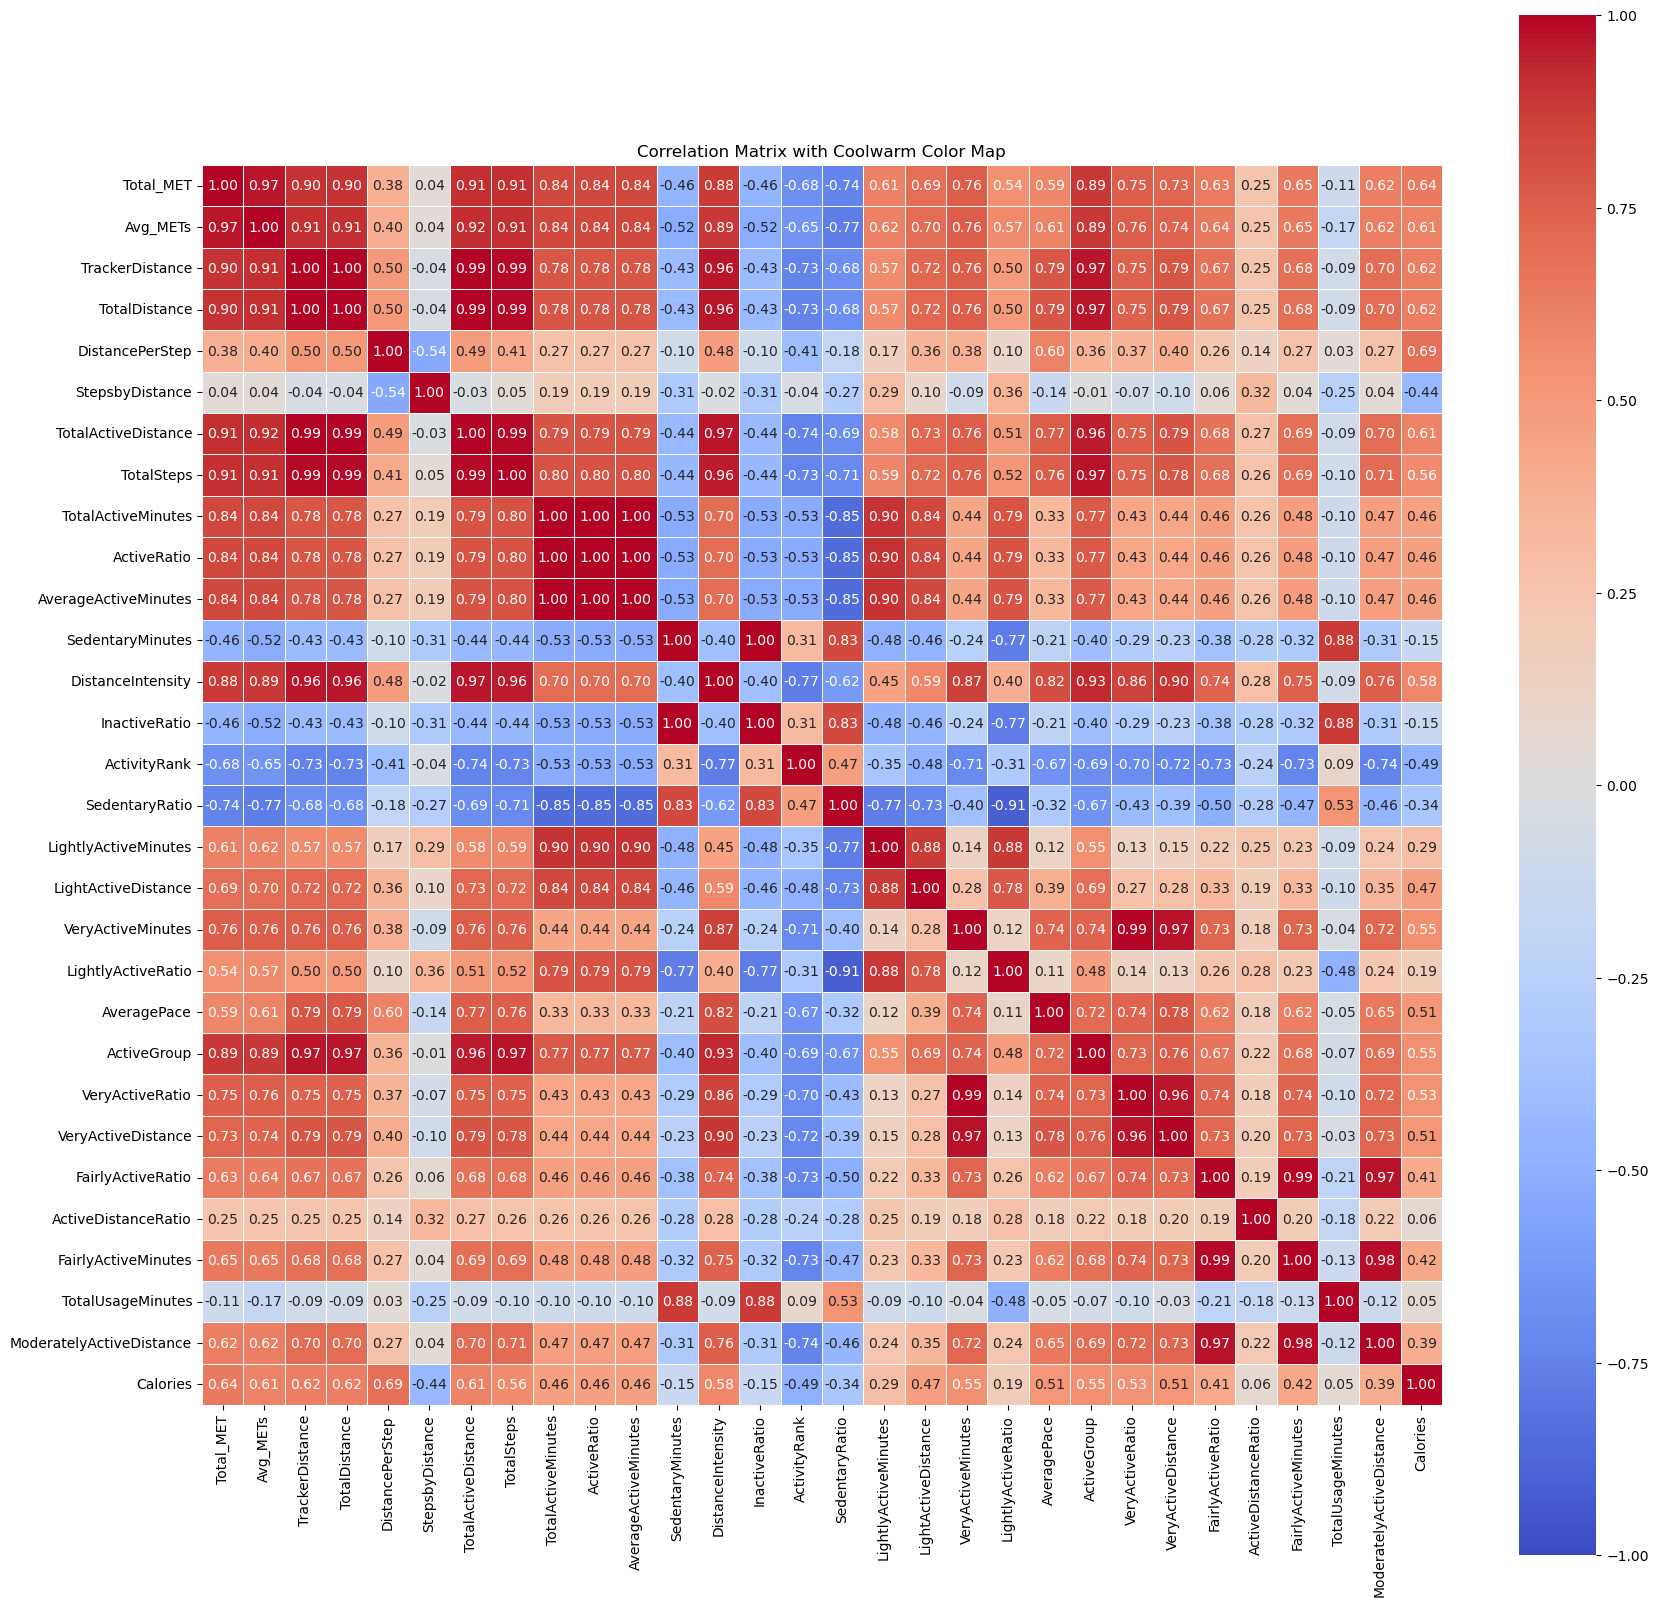

In [13]:
# Langkah 1: Hitung matriks korelasi
correlation_matrix = train.corr(method='spearman')

# Langkah 2: Plot matriks korelasi menggunakan seaborn dengan cmap 'coolwarm'
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1, square=True, linewidths=.5)
plt.title('Correlation Matrix with Coolwarm Color Map')
plt.show()

In [14]:
correlation_matrix

Total_MET  Avg_METs  TrackerDistance  TotalDistance  \
Total_MET                  1.000000  0.968345         0.903798       0.904171   
Avg_METs                   0.968345  1.000000         0.907666       0.908049   
TrackerDistance            0.903798  0.907666         1.000000       0.999747   
TotalDistance              0.904171  0.908049         0.999747       1.000000   
DistancePerStep            0.378754  0.396898         0.502259       0.503658   
StepsbyDistance            0.036292  0.038892        -0.040879      -0.042279   
TotalActiveDistance        0.911006  0.915673         0.993208       0.993454   
TotalSteps                 0.909306  0.913134         0.991965       0.992019   
TotalActiveMinutes         0.842033  0.842704         0.783515       0.784412   
ActiveRatio                0.842033  0.842704         0.783515       0.784412   
AverageActiveMinutes       0.842033  0.842704         0.783515       0.784412   
SedentaryMinutes          -0.463208 -0.518997        -0.426919      -0.426521   
DistanceIntensity          0.881935  0.890082         0.961021       0.961449   
InactiveRatio             -0.463208 -0.518997        -0.426919      -0.426521   
ActivityRank              -0.682970 -0.649525        -0.734454      -0.734665   
SedentaryRatio            -0.736860 -0.771034        -0.684503      -0.684740   
LightlyActiveMinutes       0.614007  0.615960         0.567071       0.568444   
LightActiveDistance        0.689093  0.698976         0.719888       0.720168   
VeryActiveMinutes          0.758270  0.764979         0.758244       0.758817   
LightlyActiveRatio         0.542427  0.571788         0.496155       0.496931   
AveragePace                0.586625  0.609370         0.786383       0.786221   
ActiveGroup                0.887889  0.886681         0.965382       0.965432   
VeryActiveRatio            0.750590  0.762149         0.749008       0.749453   
VeryActiveDistance         0.732956  0.739734         0.786549       0.787446   
FairlyActiveRatio          0.634744  0.642744         0.673276       0.672844   
ActiveDistanceRatio        0.253684  0.250372         0.254386       0.254024   
FairlyActiveMinutes        0.648314  0.647294         0.684658       0.684398   
TotalUsageMinutes         -0.109294 -0.167673        -0.087074      -0.085752   
ModeratelyActiveDistance   0.624652  0.621866         0.698053       0.698089   
Calories                   0.644666  0.608465         0.622068       0.622119   

                          DistancePerStep  StepsbyDistance  \
Total_MET                        0.378754         0.036292   
Avg_METs                         0.396898         0.038892   
TrackerDistance                  0.502259        -0.040879   
TotalDistance                    0.503658        -0.042279   
DistancePerStep                  1.000000        -0.538621   
StepsbyDistance                 -0.538621         1.000000   
TotalActiveDistance              0.488790        -0.030066   
TotalSteps                       0.414846         0.046527   
TotalActiveMinutes               0.269494         0.188708   
ActiveRatio                      0.269494         0.188708   
AverageActiveMinutes             0.269494         0.188708   
SedentaryMinutes                -0.099013        -0.310996   
DistanceIntensity                0.482539        -0.023816   
InactiveRatio                   -0.099013        -0.310996   
ActivityRank                    -0.409074        -0.042014   
SedentaryRatio                  -0.184949        -0.273336   
LightlyActiveMinutes             0.167546         0.291111   
LightActiveDistance              0.360103         0.098622   
VeryActiveMinutes                0.378893        -0.087006   
LightlyActiveRatio               0.100215         0.358439   
AveragePace                      0.603669        -0.142290   
ActiveGroup                      0.364660        -0.010820   
VeryActiveRatio                  0.365567        -0.073168   
VeryActiveDistance        

In [15]:
# # Langkah 2: Tentukan threshold korelasi
# threshold = 0.7
# target = 'Calories'

# # Langkah 3: Temukan pasangan fitur dengan korelasi di atas threshold
# mask = (correlation_matrix.abs() > threshold) & (correlation_matrix != 1.0)
# high_corr_pairs = mask.stack().reset_index()
# high_corr_pairs = high_corr_pairs[high_corr_pairs[0]]
# high_corr_pairs.columns = ['Feature1', 'Feature2', 'AboveThreshold']

# # Langkah 4: Identifikasi fitur dengan korelasi lebih rendah dengan "Calories" dalam setiap pasangan
# to_drop = set()
# for _, row in high_corr_pairs.iterrows():
#     feature1, feature2 = row['Feature1'], row['Feature2']
    
#     # Jika fitur sudah di-drop, skip
#     if feature1 in to_drop or feature2 in to_drop:
#         continue
    
#     # Ambil korelasi dengan "Calories" untuk kedua fitur
#     corr_feature1 = correlation_matrix.at[feature1, target]
#     corr_feature2 = correlation_matrix.at[feature2, target]
    
#     # Simpan fitur yang memiliki korelasi lebih rendah dengan "Calories" untuk di-drop
#     if abs(corr_feature1) < abs(corr_feature2):
#         to_drop.add(feature1)
#     else:
#         to_drop.add(feature2)

# # Langkah 5: Buat DataFrame gabungan untuk fitur yang di-drop dan pasangan korelasinya
# combined_data = []
# for _, row in high_corr_pairs.iterrows():
#     feature1, feature2 = row['Feature1'], row['Feature2']
    
#     if feature1 in to_drop or feature2 in to_drop:
#         # Ambil korelasi masing-masing fitur dengan "Calories"
#         corr_feature1 = correlation_matrix.at[feature1, target]
#         corr_feature2 = correlation_matrix.at[feature2, target]
        
#         # Ambil korelasi antar fitur
#         corr_between_features = correlation_matrix.at[feature1, feature2]
        
#         combined_data.append({
#             'Dropped Feature': feature1 if feature1 in to_drop else feature2,
#             'Other Feature': feature1 if feature1 not in to_drop else feature2,
#             'Correlation with Calories Dropped Feature': corr_feature1 if feature1 in to_drop else corr_feature2,
#             'Correlation with Calories Other Feature': corr_feature2 if feature1 in to_drop else corr_feature1,
#             'Correlation Between Features': corr_between_features
#         })

# # Buat DataFrame dari data gabungan
# combined_df = pd.DataFrame(combined_data)

# # Urutkan berdasarkan korelasi antar fitur
# combined_df = combined_df.sort_values(by='Correlation Between Features', ascending=False).reset_index(drop=True)
# combined_df

In [16]:
# to_drop

In [17]:
# to_drop = set(to_drop)

In [18]:
# len(to_drop)

In [19]:
# to_drop = combined_df.head(7)['Dropped Feature'].to_list()
# to_drop

In [20]:
# to_drop = [
# 'Avg_METs',
# 'TotalDistance',
# 'TotalSteps',
# 'ActiveRatio',
# 'VeryActiveDistance',
# 'InactiveRatio',
# 'ActivityRank',
# 'SedentaryRatio',
# "TotalActiveMinutes",
# "SedentaryMinutes"
# ]

In [21]:
correlation_matrix = train.corr()

# Menginisialisasi daftar untuk fitur yang akan dihapus
to_drop = set()  # Menggunakan set untuk menghindari duplikasi

# Menentukan threshold korelasi
threshold = 0.95  # Threshold yang ingin diterapkan
print(f"Threshold korelasi: {threshold}")

# Kolom yang akan diperiksa, kecuali 'Calories'
checking = [x for x in correlation_matrix.columns if x != 'Calories']

# Iterasi untuk menemukan fitur dengan korelasi tinggi
for feature in checking:
    # Mencari fitur yang berkorelasi tinggi dengan fitur saat ini
    high_corr_features = correlation_matrix.index[abs(correlation_matrix[feature]) >= threshold].tolist()
    high_corr_features.remove(feature)  # Menghindari pencocokan dengan dirinya sendiri

    # Jika ada fitur berkorelasi tinggi
    if high_corr_features:
        print(f"\nFitur: {feature} berkorelasi tinggi dengan fitur: {high_corr_features}")
        
        # Menyimpan fitur yang akan dihapus
        to_drop.add(feature)  # Awalnya tambahkan fitur yang sedang dipertimbangkan untuk dihapus
        target_corr = correlation_matrix[feature]['Calories']
        print(f"Korelasi {feature} dengan Calories: {target_corr}")

        # Tentukan fitur mana yang akan dipertahankan
        for correlated_feature in high_corr_features:
            correlated_target_corr = correlation_matrix[correlated_feature]['Calories']
            print(f"Korelasi {correlated_feature} dengan Calories: {correlated_target_corr}")

            if abs(correlated_target_corr) > abs(target_corr):
                # Jika fitur berkorelasi tinggi memiliki korelasi target lebih besar, pertahankan itu
                print(f"Mempertahankan {correlated_feature} karena memiliki korelasi target lebih tinggi.")
                to_drop.discard(feature)  # Hapus dari daftar penghapusan
            else:
                # Hapus fitur yang memiliki korelasi target lebih rendah
                print(f"Menghapus {correlated_feature} karena memiliki korelasi target lebih rendah.")
                to_drop.add(correlated_feature)

# Print fitur yang akan dihapus
print("\nFitur yang akan dihapus:", to_drop)


Threshold korelasi: 0.95

Fitur: TrackerDistance berkorelasi tinggi dengan fitur: ['TotalDistance', 'TotalActiveDistance', 'TotalSteps']
Korelasi TrackerDistance dengan Calories: 0.6469619722287698
Korelasi TotalDistance dengan Calories: 0.6465742317562881
Menghapus TotalDistance karena memiliki korelasi target lebih rendah.
Korelasi TotalActiveDistance dengan Calories: 0.6310282441984635
Menghapus TotalActiveDistance karena memiliki korelasi target lebih rendah.
Korelasi TotalSteps dengan Calories: 0.5933631260029075
Menghapus TotalSteps karena memiliki korelasi target lebih rendah.

Fitur: TotalDistance berkorelasi tinggi dengan fitur: ['TrackerDistance', 'TotalActiveDistance', 'TotalSteps']
Korelasi TotalDistance dengan Calories: 0.6465742317562881
Korelasi TrackerDistance dengan Calories: 0.6469619722287698
Mempertahankan TrackerDistance karena memiliki korelasi target lebih tinggi.
Korelasi TotalActiveDistance dengan Calories: 0.6310282441984635
Menghapus TotalActiveDistance karen

In [22]:
# Menampilkan fitur yang akan dihapus
print(f"{len(to_drop)} Fitur yang dihapus:\n", to_drop)

7 Fitur yang dihapus:
 {'TrackerDistance', 'FairlyActiveMinutes', 'TotalActiveMinutes', 'FairlyActiveRatio', 'VeryActiveMinutes', 'ActiveRatio', 'SedentaryMinutes'}


# Drop Columns

In [23]:
train = train.drop(columns=list(to_drop))
test = test.drop(columns=list(to_drop))

# Data Prep

In [24]:
# 1. Siapkan data
X_train = train.drop(columns=['Calories'])
y_train = train['Calories']
X_test = test.drop(columns=['Calories'])
y_test = test['Calories']


# Model: Baseline

## Import Libraries

In [25]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import PolynomialFeatures
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import cross_val_score


In [26]:
from sklearn.metrics import (
    mean_squared_error,
    r2_score,
    mean_absolute_error,
    mean_absolute_percentage_error
)
import matplotlib.pyplot as plt
import time

## Evaluation Function

### Without CV

In [27]:
# def evaluate_model(model, model_name):
#     start_time = time.time()
#     model.fit(X_train, y_train)
#     y_pred_train = model.predict(X_train)
#     y_pred_test = model.predict(X_test)
#     end_time = time.time()
    
#     rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
#     rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
#     r2_train = r2_score(y_train, y_pred_train)
#     r2_test = r2_score(y_test, y_pred_test)
#     mae_train = mean_absolute_error(y_train, y_pred_train)
#     mae_test = mean_absolute_error(y_test, y_pred_test)
#     mape_train = mean_absolute_percentage_error(y_train, y_pred_train)
#     mape_test = mean_absolute_percentage_error(y_test, y_pred_test)

#     # Hitung residual
#     residuals_train = y_train - y_pred_train
#     mean_residual_train = np.mean(residuals_train)  # Rata-rata residual
#     residuals = y_test - y_pred_test
#     mean_residual = np.mean(residuals)  # Rata-rata residual

#     # Plot residual
#     plt.figure(figsize=(14, 6))

#     plt.subplot(1, 2, 1)
#     plt.scatter(y_pred_test, residuals, color='blue', alpha=0.5)
#     plt.axhline(y=0, color='red', linestyle='--')
#     plt.title('Residuals vs Predicted Values')
#     plt.xlabel('Predicted Values')
#     plt.ylabel('Residuals')
    
#     #y actual vs y predicted
#     plt.subplot(1, 2, 2)
#     plt.scatter(y_test, y_pred_test, color='green', alpha=0.5)
#     plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Garis diagonal
#     plt.title('Actual vs Predicted Values')
#     plt.xlabel('Actual Values')
#     plt.ylabel('Predicted Values')
    
#     plt.tight_layout()
#     plt.show()

#     training_time = end_time - start_time

#     return {
#         'Model': model_name,
#         'Training Time (s)': training_time,
#         'RMSE Train': rmse_train,
#         'RMSE Test': rmse_test,
#         'R2 Train': r2_train,
#         'R2 Test': r2_test,
#         'MAE Train': mae_train,
#         'MAE Test': mae_test,
#         'Mean Residual Train': mean_residual_train,  # Rata-rata residual
#         'Mean Residual Test': mean_residual,  # Rata-rata residual
#         'MAPE Train': mape_train,
#         'MAPE Test': mape_test
#     }

# results = []

### With CV

In [28]:
# def evaluate_model(model, model_name):
#     start_time = time.time()
    
#     # Melatih model
#     model.fit(X_train, y_train)
    
#     # Prediksi pada train dan test set
#     y_pred_train = model.predict(X_train)
#     y_pred_test = model.predict(X_test)
    
#     # Menghitung waktu pelatihan
#     end_time = time.time()
#     training_time = end_time - start_time

#     # Metrik untuk train set
#     rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
#     r2_train = r2_score(y_train, y_pred_train)
#     mae_train = mean_absolute_error(y_train, y_pred_train)
#     mape_train = mean_absolute_percentage_error(y_train, y_pred_train)
    
#     # Metrik untuk test set
#     rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
#     r2_test = r2_score(y_test, y_pred_test)
#     mae_test = mean_absolute_error(y_test, y_pred_test)
#     mape_test = mean_absolute_percentage_error(y_test, y_pred_test)

#     # Hitung residual
#     residuals_train = y_train - y_pred_train
#     mean_residual_train = np.mean(residuals_train)  # Rata-rata residual
#     residuals = y_test - y_pred_test
#     mean_residual = np.mean(residuals)  # Rata-rata residual

#     # Cross-validation scores untuk train set
#     cv_rmse_train = np.sqrt(-cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv=3))
#     cv_r2_train = cross_val_score(model, X_train, y_train, scoring='r2', cv=3)
#     cv_mae_train = -cross_val_score(model, X_train, y_train, scoring='neg_mean_absolute_error', cv=3)
#     cv_mape_train = -cross_val_score(model, X_train, y_train, scoring='neg_mean_absolute_percentage_error', cv=3)

#     # Rata-rata metrik cross-validation untuk train set
#     cv_rmse_train_mean = np.mean(cv_rmse_train)
#     cv_r2_train_mean = np.mean(cv_r2_train)
#     cv_mae_train_mean = np.mean(cv_mae_train)
#     cv_mape_train_mean = np.mean(cv_mape_train)

#     # Cross-validation scores untuk test set (karena kita tidak memiliki label asli di dalam test set)
#     cv_rmse_test = np.sqrt(-cross_val_score(model, X_test, y_test, scoring='neg_mean_squared_error', cv=3))
#     cv_r2_test = cross_val_score(model, X_test, y_test, scoring='r2', cv=3)
#     cv_mae_test = -cross_val_score(model, X_test, y_test, scoring='neg_mean_absolute_error', cv=3)
#     cv_mape_test = -cross_val_score(model, X_test, y_test, scoring='neg_mean_absolute_percentage_error', cv=3)

#     # Rata-rata metrik cross-validation untuk test set
#     cv_rmse_test_mean = np.mean(cv_rmse_test)
#     cv_r2_test_mean = np.mean(cv_r2_test)
#     cv_mae_test_mean = np.mean(cv_mae_test)
#     cv_mape_test_mean = np.mean(cv_mape_test)

#     # Plot residual
#     plt.figure(figsize=(14, 6))

#     plt.subplot(1, 2, 1)
#     plt.scatter(y_pred_test, residuals, color='blue', alpha=0.5)
#     plt.axhline(y=0, color='red', linestyle='--')
#     plt.title('Residuals vs Predicted Values')
#     plt.xlabel('Predicted Values')
#     plt.ylabel('Residuals')
    
#     # Y actual vs Y predicted
#     plt.subplot(1, 2, 2)
#     plt.scatter(y_test, y_pred_test, color='green', alpha=0.5)
#     plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Garis diagonal
#     plt.title('Actual vs Predicted Values')
#     plt.xlabel('Actual Values')
#     plt.ylabel('Predicted Values')
    
#     plt.tight_layout()
#     plt.show()

#     return {
#         'Model': model_name,
#         'Training Time (s)': training_time,
#         'RMSE Train': cv_rmse_train_mean, 
#         'R2 Train': cv_r2_train_mean,
#         'MAE Train': cv_mae_train_mean,
#         'MAPE Train': cv_mape_train_mean,
#         'RMSE Test': cv_rmse_test_mean, 
#         'R2 Test': cv_r2_test_mean,    
#         'MAE Test': cv_mae_test_mean,       
#         'Mean Residual Train': mean_residual_train,
#         'Mean Residual Test': mean_residual,        
#         'MAPE Test': cv_mape_test_mean              
#     }

# results = []

In [29]:
# from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
# from sklearn.model_selection import cross_val_score, cross_val_predict
# import numpy as np
# import matplotlib.pyplot as plt
# import time

# def evaluate_model(model, model_name):
#     start_time = time.time()

#     # Cross-validation pada train set
#     y_cv_train_pred = cross_val_predict(model, X_train, y_train, cv=3)
#     cv_rmse_train = np.sqrt(-cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv=3))
#     cv_r2_train = cross_val_score(model, X_train, y_train, scoring='r2', cv=3)
#     cv_mae_train = -cross_val_score(model, X_train, y_train, scoring='neg_mean_absolute_error', cv=3)
#     cv_mape_train = -cross_val_score(model, X_train, y_train, scoring='neg_mean_absolute_percentage_error', cv=3)

#     # Latih model pada keseluruhan train set
#     model.fit(X_train, y_train)
#     training_time = time.time() - start_time

#     # Prediksi pada train dan test set
#     y_pred_train = model.predict(X_train)
#     y_pred_test = model.predict(X_test)

#     # Metrik untuk train set tanpa CV
#     # rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
#     # r2_train = r2_score(y_train, y_pred_train)
#     # mae_train = mean_absolute_error(y_train, y_pred_train)
#     # mape_train = mean_absolute_percentage_error(y_train, y_pred_train)

#     # Metrik untuk test set
#     rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
#     r2_test = r2_score(y_test, y_pred_test)
#     mae_test = mean_absolute_error(y_test, y_pred_test)
#     mape_test = mean_absolute_percentage_error(y_test, y_pred_test)

#     # Residuals untuk train dan test set
#     residuals_train = y_train - y_pred_train
#     residuals_test = y_test - y_pred_test

#     # Plot residual untuk train dan test
#     plt.figure(figsize=(18, 6))

#     # Plot residual train
#     plt.subplot(1, 3, 1)
#     plt.scatter(y_pred_train, residuals_train, color='blue', alpha=0.5)
#     plt.axhline(y=0, color='red', linestyle='--')
#     plt.title('Train Residuals')
#     plt.xlabel('Predicted Values (Train)')
#     plt.ylabel('Residuals (Train)')

#     # Plot residual test
#     plt.subplot(1, 3, 2)
#     plt.scatter(y_pred_test, residuals_test, color='green', alpha=0.5)
#     plt.axhline(y=0, color='red', linestyle='--')
#     plt.title('Test Residuals')
#     plt.xlabel('Predicted Values (Test)')
#     plt.ylabel('Residuals (Test)')

#     # Plot Actual vs Predicted
#     plt.subplot(1, 3, 3)
#     plt.scatter(y_test, y_pred_test, color='purple', alpha=0.5)
#     plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Garis diagonal
#     plt.title('Actual vs Predicted Values')
#     plt.xlabel('Actual Values')
#     plt.ylabel('Predicted Values')

#     plt.tight_layout()
#     plt.show()

#     # Hasil akhir sebagai dictionary
#     return {
#         'Model': model_name,
#         'Training Time (s)': training_time,
#         'Train RMSE': np.mean(cv_rmse_train),  # RMSE dari CV untuk train
#         'Train R2': np.mean(cv_r2_train),
#         'Train MAE': np.mean(cv_mae_train),
#         'Train MAPE': np.mean(cv_mape_train),
#         'Test RMSE': rmse_test,
#         'Test R2': r2_test,
#         'Test MAE': mae_test,
#         'Test MAPE': mape_test,
#         'Residual Mean Train': np.mean(residuals_train),
#         'Residual Mean Test': np.mean(residuals_test)
#     }

# # Contoh penggunaan
# results = []


In [30]:
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns
# import time
# from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
# from sklearn.model_selection import cross_validate

# def evaluate_model(model, model_name):
#     start_time = time.time()
    
#     # Cross-validate the model
#     cv_results = cross_validate(model, X_train, y_train, cv=3, 
#                                 scoring=['neg_mean_squared_error', 'r2', 'neg_mean_absolute_error', 
#                                          'neg_mean_absolute_percentage_error'], 
#                                 return_train_score=True)

#     # Calculate metrics from cross-validation results
#     rmse_train = np.sqrt(-np.mean(cv_results['train_neg_mean_squared_error']))
#     rmse_test = np.sqrt(mean_squared_error(y_test, model.fit(X_train, y_train).predict(X_test)))
#     r2_train = np.mean(cv_results['train_r2'])
#     r2_test = r2_score(y_test, model.predict(X_test))
#     mae_train = -np.mean(cv_results['train_neg_mean_absolute_error'])
#     mae_test = mean_absolute_error(y_test, model.predict(X_test))
#     mape_train = -np.mean(cv_results['train_neg_mean_absolute_percentage_error'])
#     mape_test = mean_absolute_percentage_error(y_test, model.predict(X_test))

#     # Hitung residual
#     y_pred_train = model.predict(X_train)
#     y_pred_test = model.predict(X_test)
#     residuals_train = y_train - y_pred_train
#     mean_residual_train = np.mean(residuals_train)  # Rata-rata residual
#     residuals_test = y_test - y_pred_test
#     mean_residual_test = np.mean(residuals_test)  # Rata-rata residual

#     # Plot residual
#     plt.figure(figsize=(14, 6))

#     # Residuals vs Predicted Values
#     plt.subplot(1, 2, 1)
#     plt.scatter(y_pred_test, residuals_test, color='blue', alpha=0.5)
#     plt.axhline(y=0, color='red', linestyle='--')
#     plt.title('Residuals vs Predicted Values')
#     plt.xlabel('Predicted Values')
#     plt.ylabel('Residuals')
    
#     # Actual vs Predicted Values
#     plt.subplot(1, 2, 2)
#     plt.scatter(y_test, y_pred_test, color='green', alpha=0.5)
#     plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Garis diagonal
#     plt.title('Actual vs Predicted Values')
#     plt.xlabel('Actual Values')
#     plt.ylabel('Predicted Values')
    
#     plt.tight_layout()
#     plt.show()

#     end_time = time.time()
#     training_time = end_time - start_time

#     return {
#         'Model': model_name,
#         'Training Time (s)': training_time,
#         'RMSE Train': rmse_train,
#         'RMSE Test': rmse_test,
#         'R2 Train': r2_train,
#         'R2 Test': r2_test,
#         'MAE Train': mae_train,
#         'MAE Test': mae_test,
#         'Mean Residual Train': mean_residual_train,  # Rata-rata residual
#         'Mean Residual Test': mean_residual_test,  # Rata-rata residual
#         'MAPE Train': mape_train,
#         'MAPE Test': mape_test
#     }

# results = []


In [31]:
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns
# import time
# from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
# from sklearn.model_selection import KFold

# def evaluate_model(model, model_name):
#     start_time = time.time()
    
#     # Inisialisasi K-Fold
#     kf = KFold(n_splits=3, shuffle=True, random_state=42)
    
#     rmse_train_list = []
#     r2_train_list = []
#     mae_train_list = []
#     mape_train_list = []
    
#     # K-Fold Cross Validation
#     for train_index, val_index in kf.split(X_train):
#         X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
#         y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]
        
#         # Latih model pada lipatan
#         model.fit(X_train_fold, y_train_fold)
#         y_train_pred = model.predict(X_train_fold)
#         y_val_pred = model.predict(X_val_fold)
        
#         # Hitung metrik untuk lipatan
#         rmse_train_list.append(np.sqrt(mean_squared_error(y_train_fold, y_train_pred)))
#         r2_train_list.append(r2_score(y_train_fold, y_train_pred))
#         mae_train_list.append(mean_absolute_error(y_train_fold, y_train_pred))
#         mape_train_list.append(mean_absolute_percentage_error(y_train_fold, y_train_pred))

#     # Rata-rata metrik untuk data latih
#     rmse_train = np.mean(rmse_train_list)
#     r2_train = np.mean(r2_train_list)
#     mae_train = np.mean(mae_train_list)
#     mape_train = np.mean(mape_train_list)

#     # Latih model dengan semua data latih untuk evaluasi
#     model.fit(X_train, y_train)
    
#     # Hitung prediksi untuk data uji
#     y_test_pred = model.predict(X_test)
    
#     # Hitung metrik untuk data uji
#     rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
#     r2_test = r2_score(y_test, y_test_pred)
#     mae_test = mean_absolute_error(y_test, y_test_pred)
#     mape_test = mean_absolute_percentage_error(y_test, y_test_pred)

#     # Hitung residual untuk data latih dan data uji
#     y_train_pred = model.predict(X_train)  # Prediksi pada seluruh data latih
#     residuals_train = y_train - y_train_pred
#     residuals_test = y_test - y_test_pred
#     mean_residual_train = np.mean(residuals_train)
#     mean_residual_test = np.mean(residuals_test)

#     # Plot residual
#     plt.figure(figsize=(14, 6))

#     # Residuals vs Predicted Values (data uji)
#     plt.subplot(1, 2, 1)
#     plt.scatter(y_test_pred, residuals_test, color='blue', alpha=0.5)
#     plt.axhline(y=0, color='red', linestyle='--')
#     plt.title('Residuals vs Predicted Values (Test)')
#     plt.xlabel('Predicted Values')
#     plt.ylabel('Residuals')
    
#     # Actual vs Predicted Values (data uji)
#     plt.subplot(1, 2, 2)
#     plt.scatter(y_test, y_test_pred, color='green', alpha=0.5)
#     plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Garis diagonal
#     plt.title('Actual vs Predicted Values (Test)')
#     plt.xlabel('Actual Values')
#     plt.ylabel('Predicted Values')
    
#     plt.tight_layout()
#     plt.show()

#     # Plot residuals untuk data latih
#     plt.figure(figsize=(8, 6))
#     plt.scatter(y_train_pred, residuals_train, color='orange', alpha=0.5)
#     plt.axhline(y=0, color='red', linestyle='--')
#     plt.title('Residuals vs Predicted Values (Train)')
#     plt.xlabel('Predicted Values (Train)')
#     plt.ylabel('Residuals (Train)')
#     plt.show()

#     end_time = time.time()
#     training_time = end_time - start_time

#     return {
#         'Model': model_name,
#         'Training Time (s)': training_time,
#         'RMSE Train': rmse_train,
#         'RMSE Test': rmse_test,
#         'R2 Train': r2_train,
#         'R2 Test': r2_test,
#         'MAE Train': mae_train,
#         'MAE Test': mae_test,
#         'Mean Residual Train': mean_residual_train,
#         'Mean Residual Test': mean_residual_test,
#         'MAPE Train': mape_train,
#         'MAPE Test': mape_test
#     }

# results = []


In [32]:
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
from sklearn.model_selection import KFold

def evaluate_model(model, model_name):
    start_time = time.time()
    
    # Inisialisasi K-Fold
    kf = KFold(n_splits=3, shuffle=True, random_state=42)
    
    rmse_train_list = []
    r2_train_list = []
    mae_train_list = []
    mape_train_list = []
    
    # K-Fold Cross Validation
    for train_index, val_index in kf.split(X_train):
        X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
        y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]
        
        # Latih model pada lipatan
        model.fit(X_train_fold, y_train_fold)
        y_train_pred = model.predict(X_train_fold)
        y_val_pred = model.predict(X_val_fold)
        
        # Hitung metrik untuk lipatan
        rmse_train_list.append(np.sqrt(mean_squared_error(y_train_fold, y_train_pred)))
        r2_train_list.append(r2_score(y_train_fold, y_train_pred))
        mae_train_list.append(mean_absolute_error(y_train_fold, y_train_pred))
        mape_train_list.append(mean_absolute_percentage_error(y_train_fold, y_train_pred))

    # Rata-rata metrik untuk data latih
    rmse_train = np.mean(rmse_train_list)
    r2_train = np.mean(r2_train_list)
    mae_train = np.mean(mae_train_list)
    mape_train = np.mean(mape_train_list)

    # Latih model dengan semua data latih untuk evaluasi
    model.fit(X_train, y_train)
    
    # Hitung prediksi untuk data uji
    y_test_pred = model.predict(X_test)
    
    # Hitung metrik untuk data uji
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    r2_test = r2_score(y_test, y_test_pred)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    mape_test = mean_absolute_percentage_error(y_test, y_test_pred)

    # Hitung residual untuk data latih dan data uji
    y_train_pred = model.predict(X_train)  # Prediksi pada seluruh data latih
    residuals_train = y_train - y_train_pred
    residuals_test = y_test - y_test_pred
    mean_residual_train = np.mean(residuals_train)
    mean_residual_test = np.mean(residuals_test)

    # Plot residual
    plt.figure(figsize=(14, 6))

    # Plot residual dan nilai aktual vs prediksi
    plt.figure(figsize=(20, 6))

    # Residuals vs Predicted Values (data latih)
    plt.subplot(1, 3, 1)
    plt.scatter(y_train_pred, residuals_train, color='orange', alpha=0.5)
    plt.axhline(y=0, color='red', linestyle='--')
    plt.title('Residuals vs Predicted Values (Train)')
    plt.xlabel('Predicted Values (Train)')
    plt.ylabel('Residuals (Train)')
    
    # Residuals vs Predicted Values (data uji)
    plt.subplot(1, 3, 2)
    plt.scatter(y_test_pred, residuals_test, color='blue', alpha=0.5)
    plt.axhline(y=0, color='red', linestyle='--')
    plt.title('Residuals vs Predicted Values (Test)')
    plt.xlabel('Predicted Values (Test)')
    plt.ylabel('Residuals (Test)')
    
    # Actual vs Predicted Values (data uji)
    plt.subplot(1, 3, 3)
    plt.scatter(y_test, y_test_pred, color='green', alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Garis diagonal
    plt.title('Actual vs Predicted Values (Test)')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')

    plt.tight_layout()
    plt.show()

    end_time = time.time()
    training_time = end_time - start_time

    return {
        'Model': model_name,
        'Training Time (s)': training_time,
        'RMSE Train': rmse_train,
        'RMSE Test': rmse_test,
        'R2 Train': r2_train,
        'R2 Test': r2_test,
        'MAE Train': mae_train,
        'MAE Test': mae_test,
        'Mean Residual Train': mean_residual_train,
        'Mean Residual Test': mean_residual_test,
        'MAPE Train': mape_train,
        'MAPE Test': mape_test
    }

results = []


## Random Forest

<Figure size 1400x600 with 0 Axes>

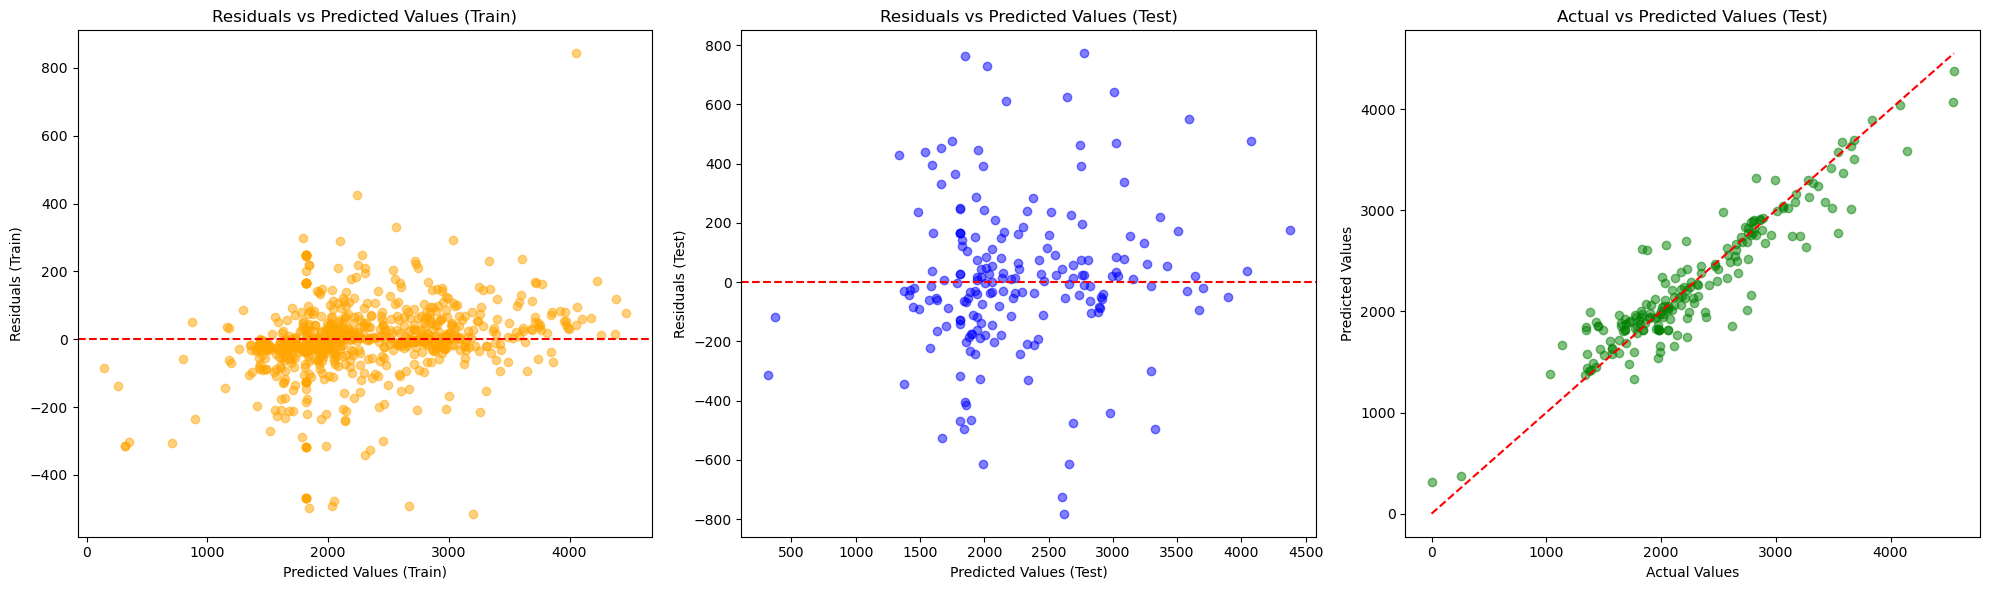

{'Model': 'Random Forest',
 'Training Time (s)': 5.165720701217651,
 'RMSE Train': 123.16003001181723,
 'RMSE Test': 256.9289255512711,
 'R2 Train': 0.9699049385277458,
 'R2 Test': 0.8701214726785473,
 'MAE Train': 78.88370000008956,
 'MAE Test': 180.06026633670294,
 'Mean Residual Train': -2.9454479735988,
 'Mean Residual Test': 11.62675727593522,
 'MAPE Train': 6798144635053768.0,
 'MAPE Test': 7533468142635498.0}

In [33]:
rf_results = evaluate_model(RandomForestRegressor(random_state=42), 'Random Forest')
results.append(rf_results)
rf_results

## Linear Regression

<Figure size 1400x600 with 0 Axes>

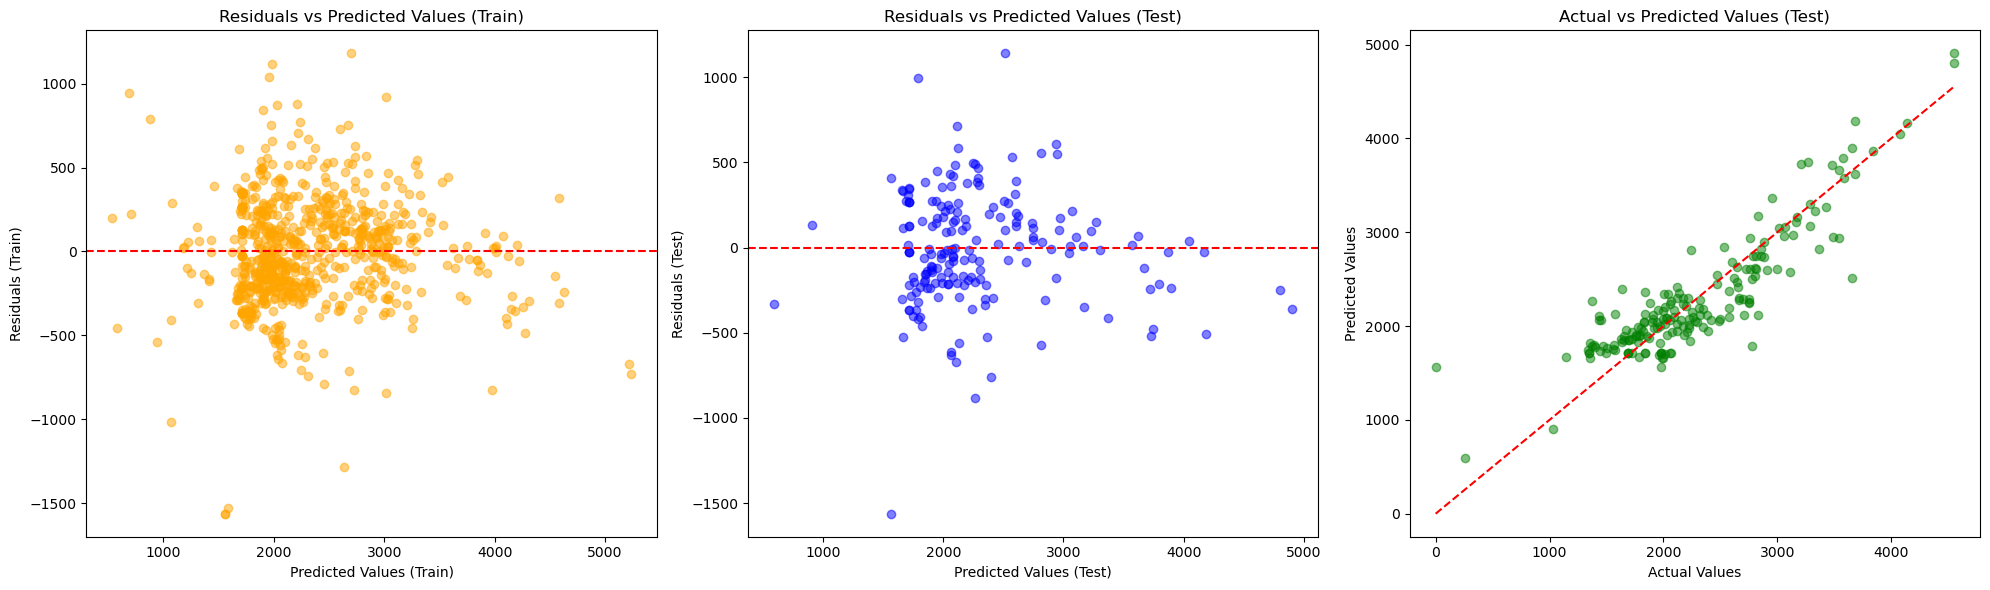

{'Model': 'Linear Regression',
 'Training Time (s)': 0.8284046649932861,
 'RMSE Train': 309.68317185253954,
 'RMSE Test': 330.9930208281961,
 'R2 Train': 0.8115901718388052,
 'R2 Test': 0.7844495036831255,
 'MAE Train': 235.34588343609403,
 'MAE Test': 252.31756434109113,
 'Mean Residual Train': -2.0345553914494268e-13,
 'Mean Residual Test': -9.195608520284068,
 'MAPE Train': 1.8605079001903796e+16,
 'MAPE Test': 3.740510151305175e+16}

In [34]:
lr_results = evaluate_model(LinearRegression(), 'Linear Regression')
results.append(lr_results)
lr_results

## Ridge

<Figure size 1400x600 with 0 Axes>

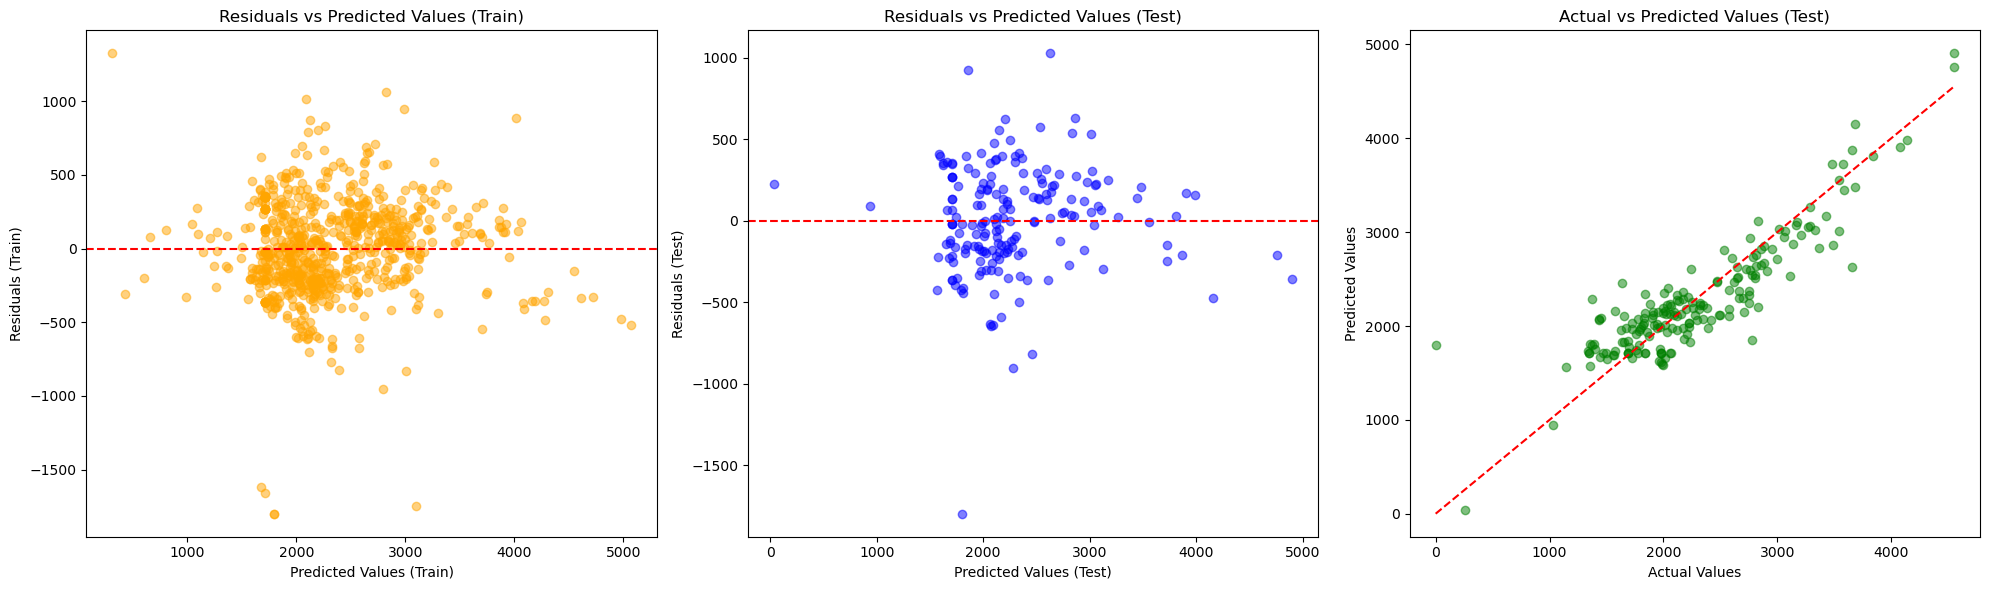

{'Model': 'Ridge',
 'Training Time (s)': 0.9772069454193115,
 'RMSE Train': 325.0981107229607,
 'RMSE Test': 327.074847220816,
 'R2 Train': 0.7924061779527176,
 'R2 Test': 0.7895225136402271,
 'MAE Train': 243.37893073644486,
 'MAE Test': 247.4604952057648,
 'Mean Residual Train': -5.570806428968668e-14,
 'Mean Residual Test': 5.646431650199852,
 'MAPE Train': 2.202903617443715e+16,
 'MAPE Test': 4.3084951421054904e+16}

In [35]:
ridge_results = evaluate_model(Ridge(random_state=42), 'Ridge')
results.append(ridge_results)
ridge_results

## Lasso

c:\Users\Asty\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.491e+05, tolerance: 2.325e+04
  model = cd_fast.enet_coordinate_descent(
c:\Users\Asty\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.182e+06, tolerance: 2.694e+04
  model = cd_fast.enet_coordinate_descent(
c:\Users\Asty\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.511e+06, tolerance: 

<Figure size 1400x600 with 0 Axes>

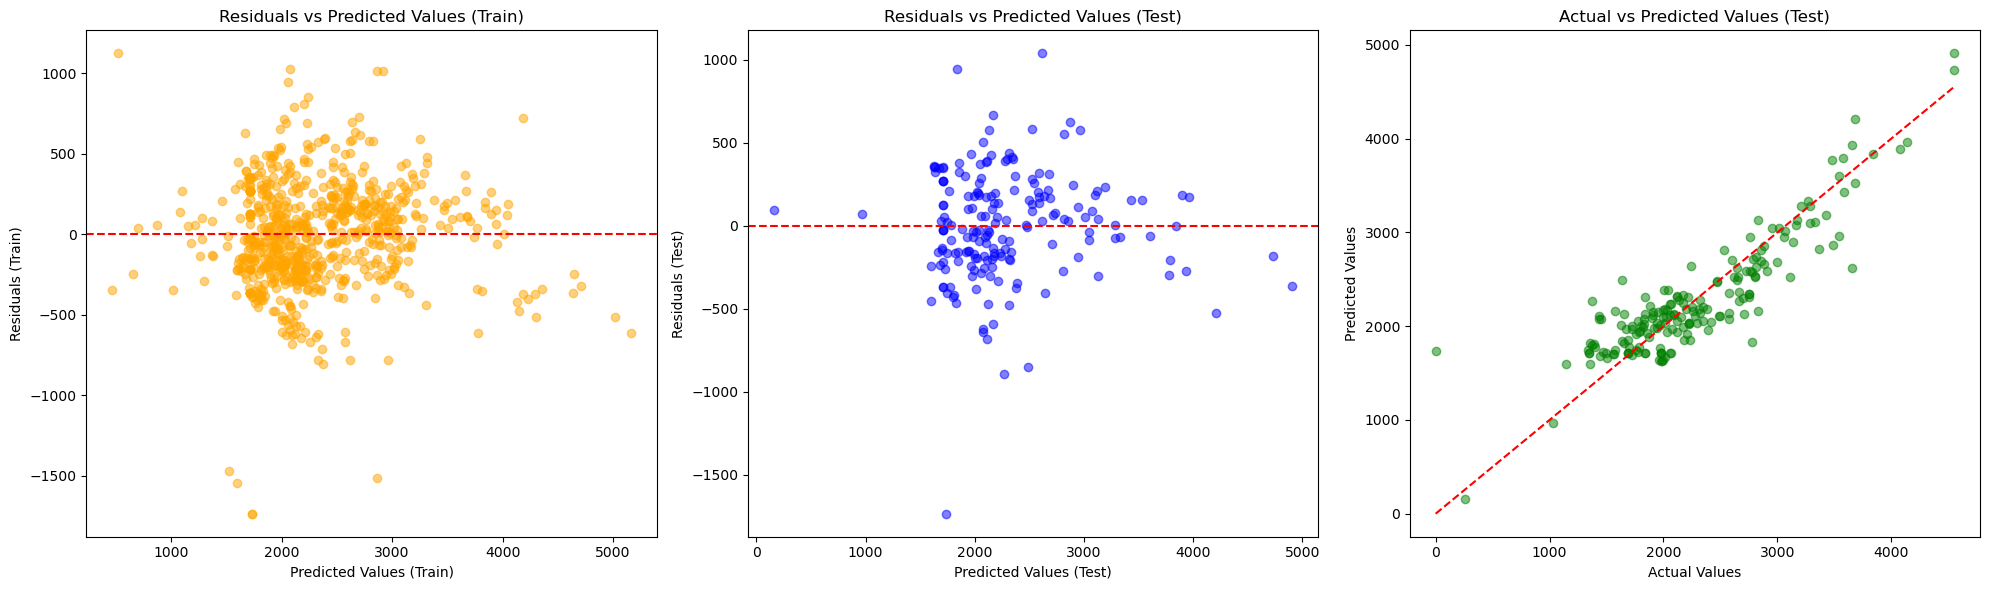

{'Model': 'Lasso',
 'Training Time (s)': 0.8673102855682373,
 'RMSE Train': 317.31490742759337,
 'RMSE Test': 327.3750786023286,
 'R2 Train': 0.8021577430753276,
 'R2 Test': 0.7891359296525302,
 'MAE Train': 239.85823192821124,
 'MAE Test': 246.70486040110166,
 'Mean Residual Train': -7.447925986555937e-14,
 'Mean Residual Test': -0.6239676241597979,
 'MAPE Train': 2.077294898571252e+16,
 'MAPE Test': 4.155607198788169e+16}

In [36]:
lasso_results = evaluate_model(Lasso(random_state=42), 'Lasso')
results.append(lasso_results)
lasso_results

## Elastic Net

<Figure size 1400x600 with 0 Axes>

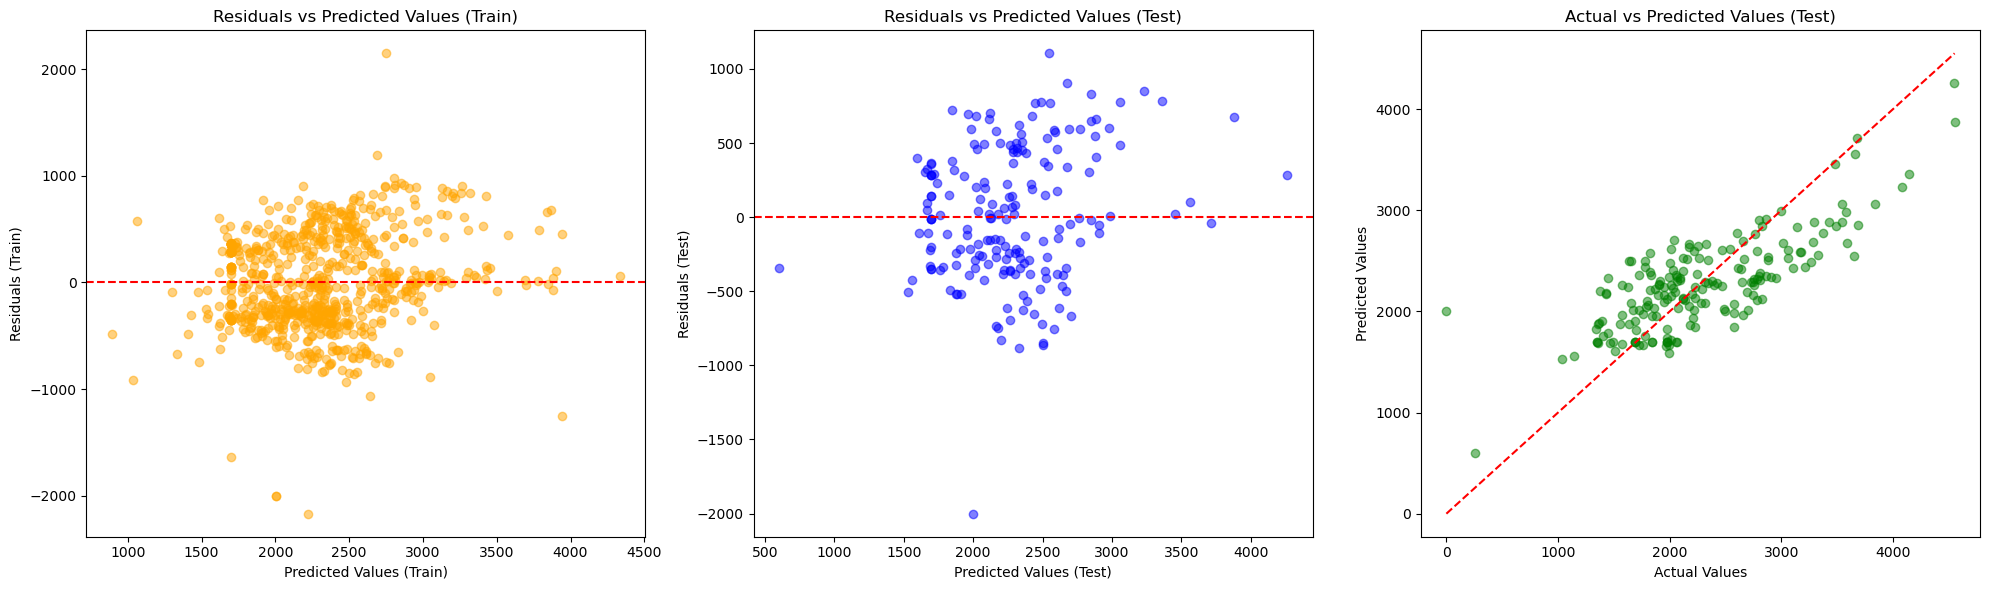

{'Model': 'Elastic Net',
 'Training Time (s)': 0.8370087146759033,
 'RMSE Train': 449.83411429121594,
 'RMSE Test': 457.6623704061263,
 'R2 Train': 0.6027973816121214,
 'R2 Test': 0.5879008057358127,
 'MAE Train': 363.4502112039857,
 'MAE Test': 373.4215589256873,
 'Mean Residual Train': -9.688359006902032e-15,
 'Mean Residual Test': 18.772052313213585,
 'MAPE Train': 2.3671881036268884e+16,
 'MAPE Test': 4.793072633310714e+16}

In [37]:
elastic_net_results = evaluate_model(ElasticNet(random_state=42), 'Elastic Net')
results.append(elastic_net_results)
elastic_net_results

## Decision Tree

<Figure size 1400x600 with 0 Axes>

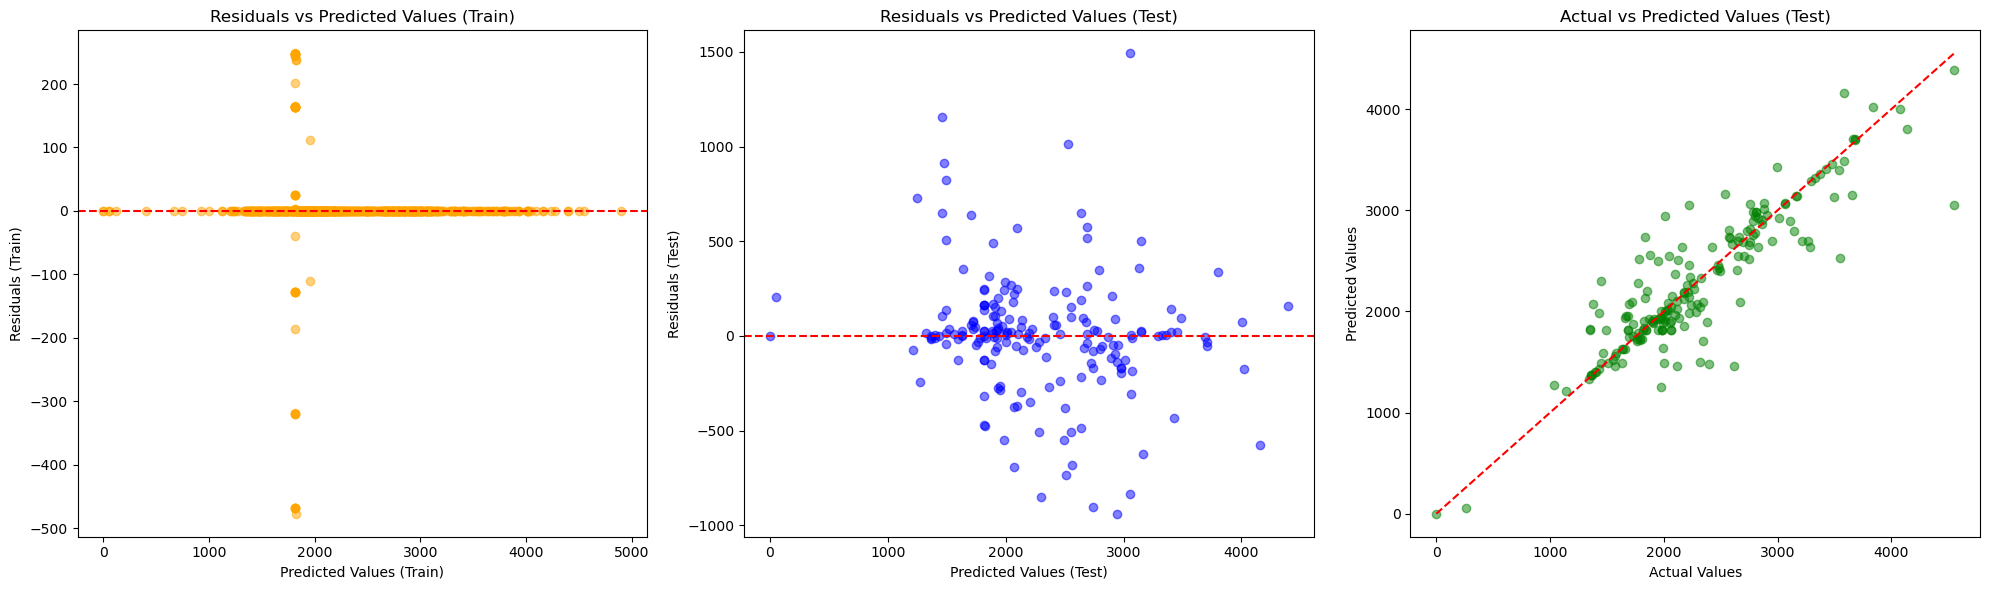

{'Model': 'Decision Tree',
 'Training Time (s)': 0.937070369720459,
 'RMSE Train': 60.48917621538144,
 'RMSE Test': 329.81925645883683,
 'R2 Train': 0.9926124417549117,
 'R2 Test': 0.7859755593617713,
 'MAE Train': 13.220285010342286,
 'MAE Test': 208.44384057971013,
 'Mean Residual Train': -2.7248509706911963e-15,
 'Mean Residual Test': 8.36027597903176,
 'MAPE Train': 0.007824489445090128,
 'MAPE Test': 0.09860552919157903}

In [38]:
dt_results = evaluate_model(DecisionTreeRegressor(random_state=42), 'Decision Tree')
results.append(dt_results)
dt_results

## XGBoost

<Figure size 1400x600 with 0 Axes>

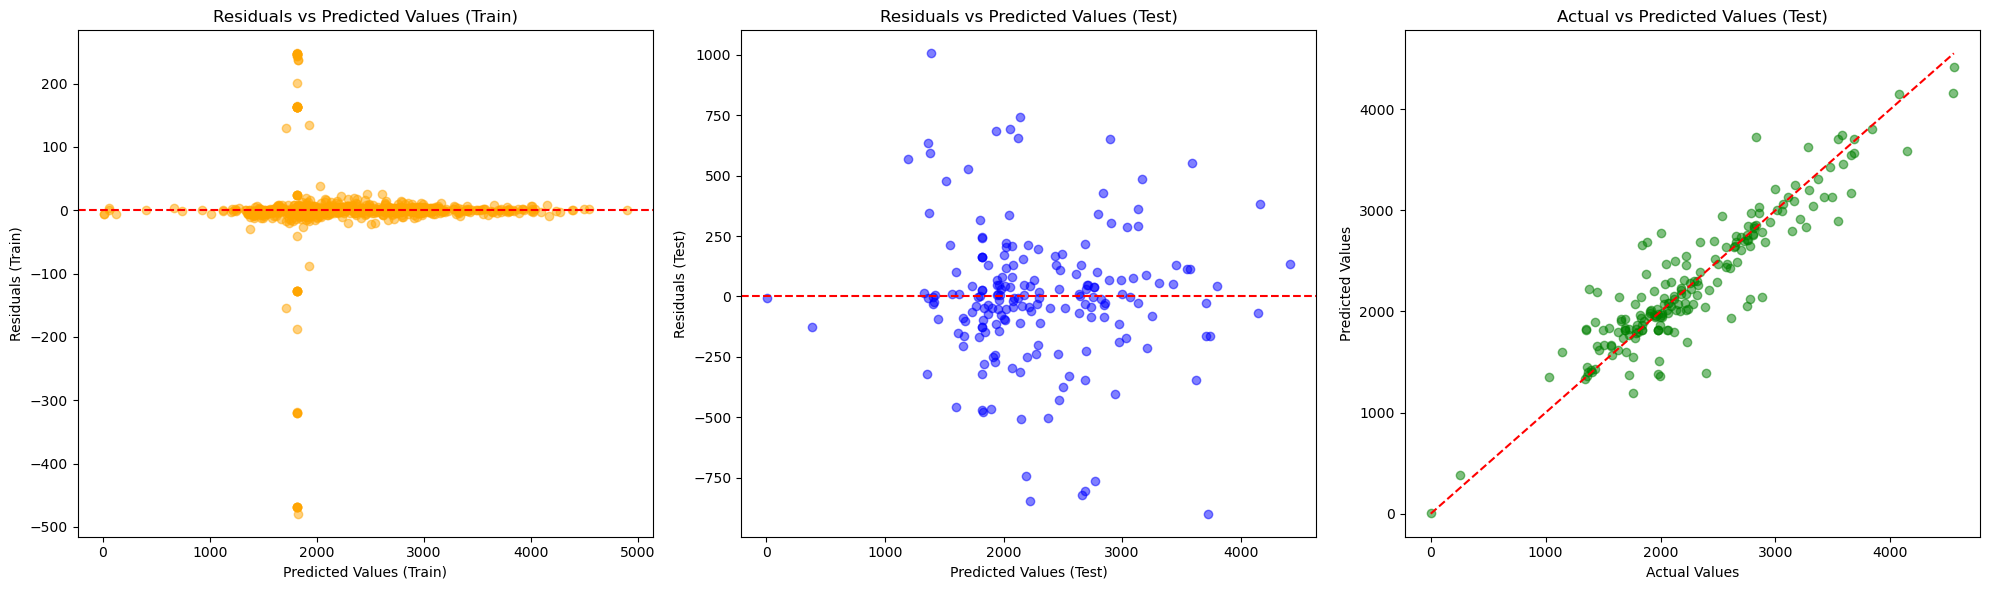

{'Model': 'XGBoost',
 'Training Time (s)': 3.0408945083618164,
 'RMSE Train': 61.47550971440694,
 'RMSE Test': 284.7409305205397,
 'R2 Train': 0.992324690024058,
 'R2 Test': 0.8404814600944519,
 'MAE Train': 15.067035335560123,
 'MAE Test': 191.62893638965932,
 'Mean Residual Train': -0.009204787039725028,
 'Mean Residual Test': -2.1510194286387017,
 'MAPE Train': 26127598894191.207,
 'MAPE Test': 152399820948850.47}

In [39]:
xgb_results = evaluate_model(XGBRegressor(random_state=42), 'XGBoost')
results.append(xgb_results)
xgb_results

## Gradient Boosting

<Figure size 1400x600 with 0 Axes>

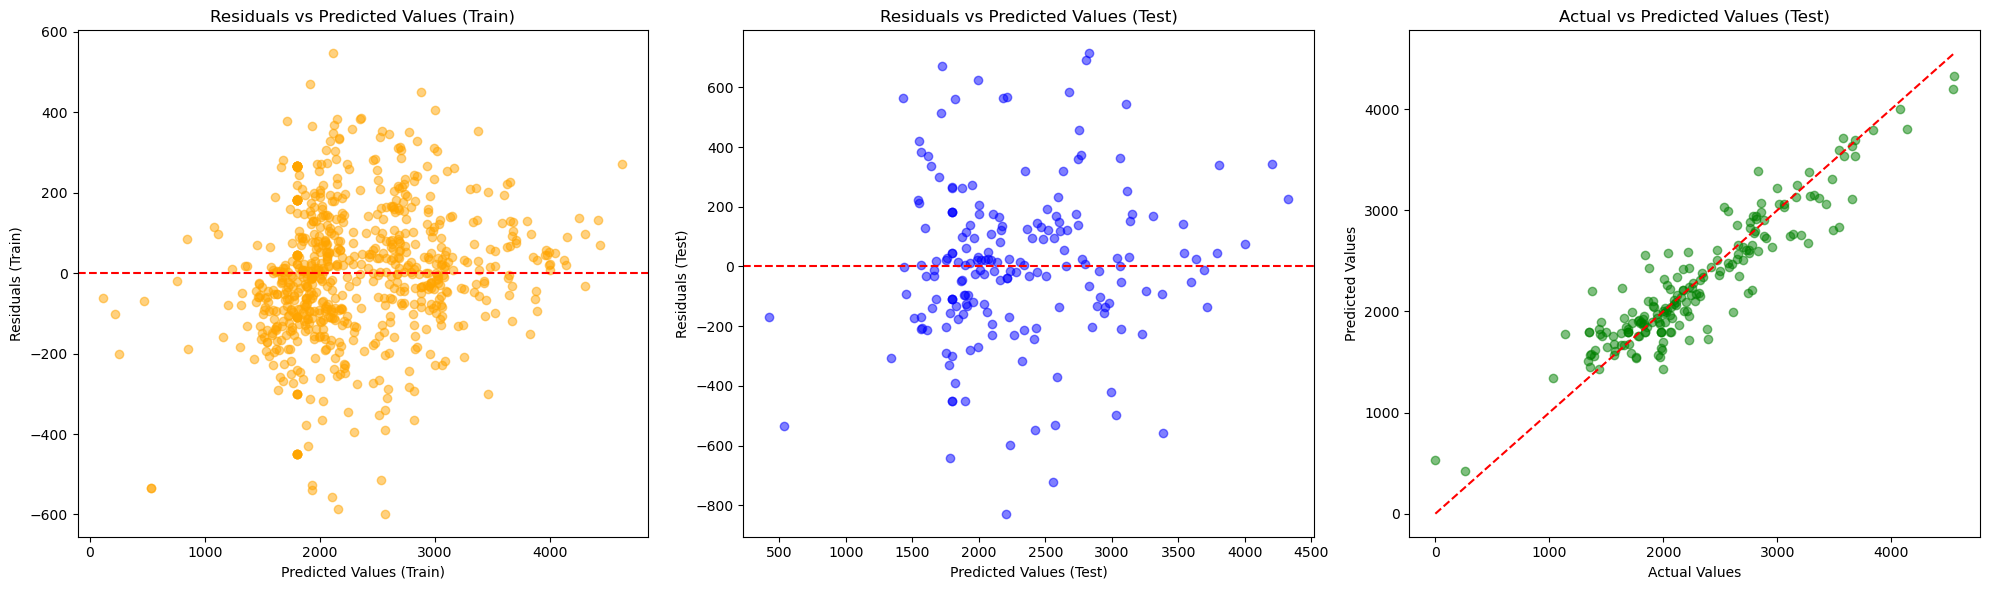

{'Model': 'Gradient Boosting',
 'Training Time (s)': 2.9524848461151123,
 'RMSE Train': 147.51548487164635,
 'RMSE Test': 265.81714785817,
 'R2 Train': 0.9571869166129421,
 'R2 Test': 0.8609799815567885,
 'MAE Train': 109.77857430126242,
 'MAE Test': 195.26175233812555,
 'Mean Residual Train': 1.5107784826387855e-13,
 'Mean Residual Test': 8.558694131922541,
 'MAPE Train': 5711800928693021.0,
 'MAPE Test': 1.280783206952714e+16}

In [40]:
gb_results = evaluate_model(GradientBoostingRegressor(random_state=42), 'Gradient Boosting')
results.append(gb_results)
gb_results

## SVR

<Figure size 1400x600 with 0 Axes>

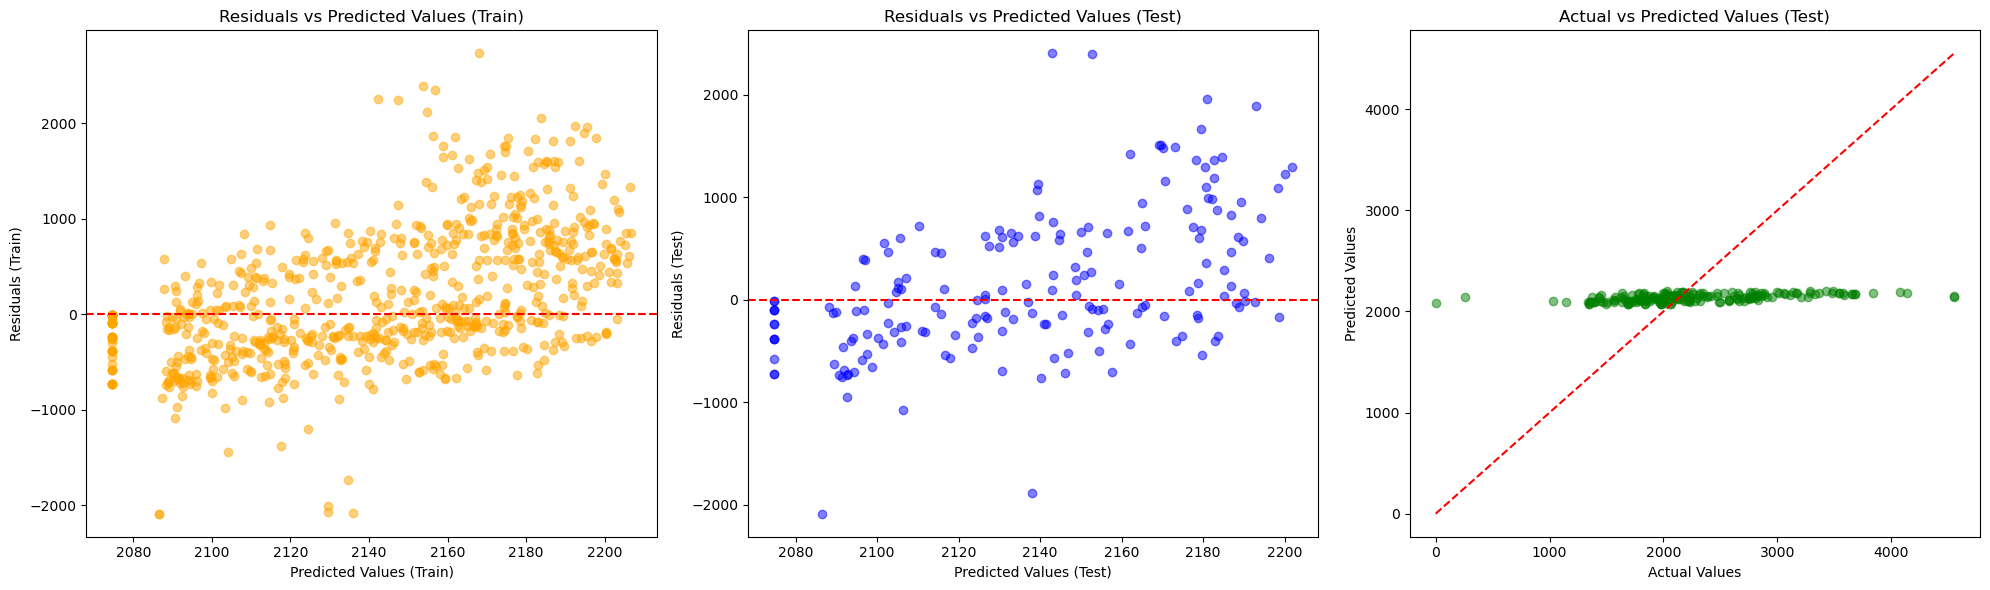

{'Model': 'Support Vector Regressor',
 'Training Time (s)': 1.1795222759246826,
 'RMSE Train': 715.807357763981,
 'RMSE Test': 710.4952227338241,
 'R2 Train': -0.005453199926473973,
 'R2 Test': 0.0068069350533201955,
 'MAE Train': 548.5332916523151,
 'MAE Test': 530.6508291612523,
 'Mean Residual Train': 168.38562321520638,
 'Mean Residual Test': 153.14783906203607,
 'MAPE Train': 2.5480318358388916e+16,
 'MAPE Test': 4.998173611638112e+16}

In [41]:
svr_results = evaluate_model(SVR(), 'Support Vector Regressor')
results.append(svr_results)
svr_results

## Bayesian Ridge

<Figure size 1400x600 with 0 Axes>

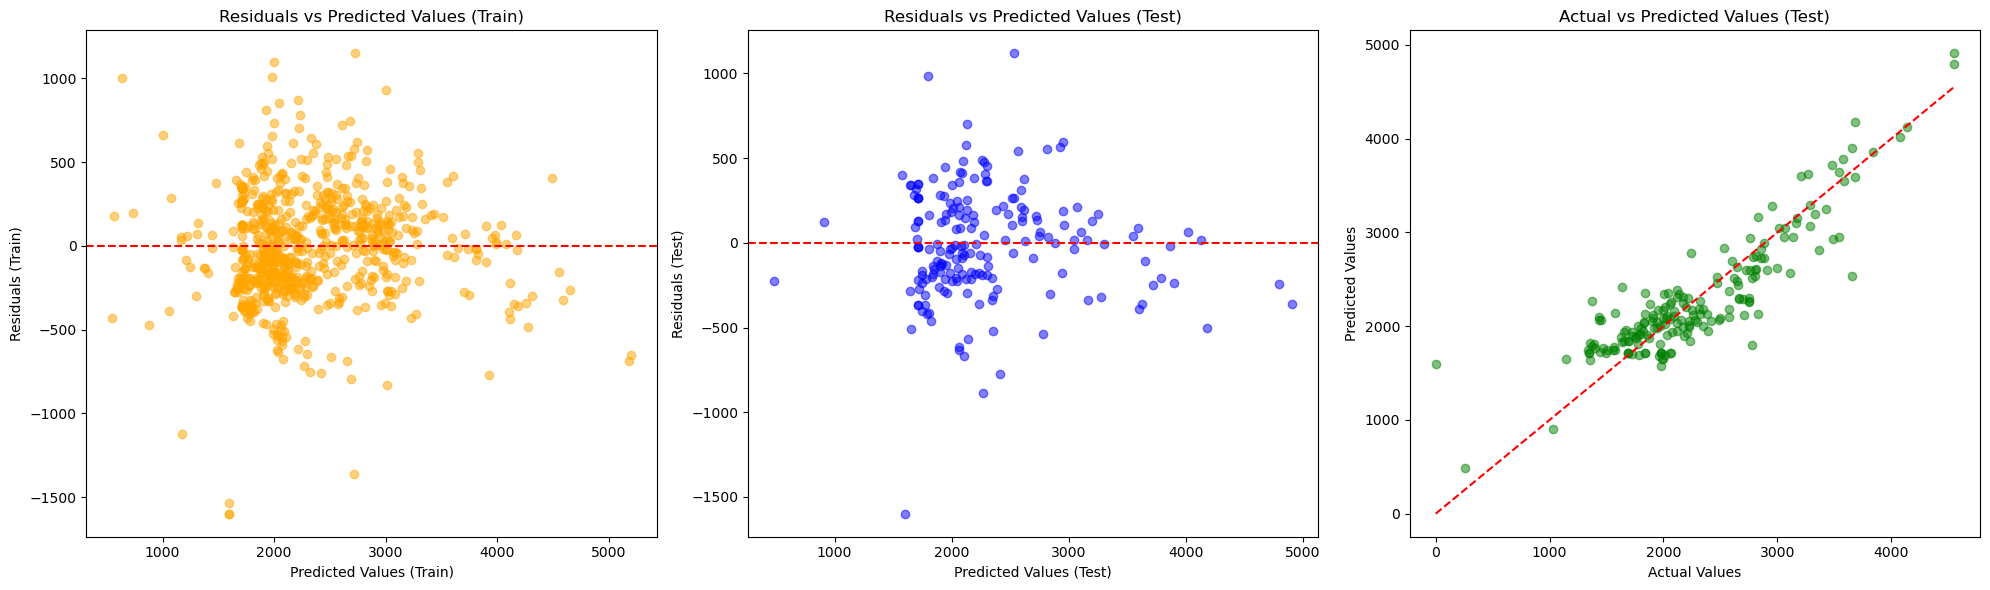

{'Model': 'Bayesian Ridge',
 'Training Time (s)': 1.0191786289215088,
 'RMSE Train': 310.7691766288956,
 'RMSE Test': 327.73621178105833,
 'R2 Train': 0.8102504583611442,
 'R2 Test': 0.7886704573659088,
 'MAE Train': 235.76843495140687,
 'MAE Test': 249.6775885125723,
 'Mean Residual Train': -1.683352377449228e-13,
 'Mean Residual Test': -6.676929273708444,
 'MAPE Train': 1.9382774539616564e+16,
 'MAPE Test': 3.830625242487587e+16}

In [42]:
br_results = evaluate_model(BayesianRidge(), 'Bayesian Ridge')
results.append(br_results)
br_results

## CatBoost

<Figure size 1400x600 with 0 Axes>

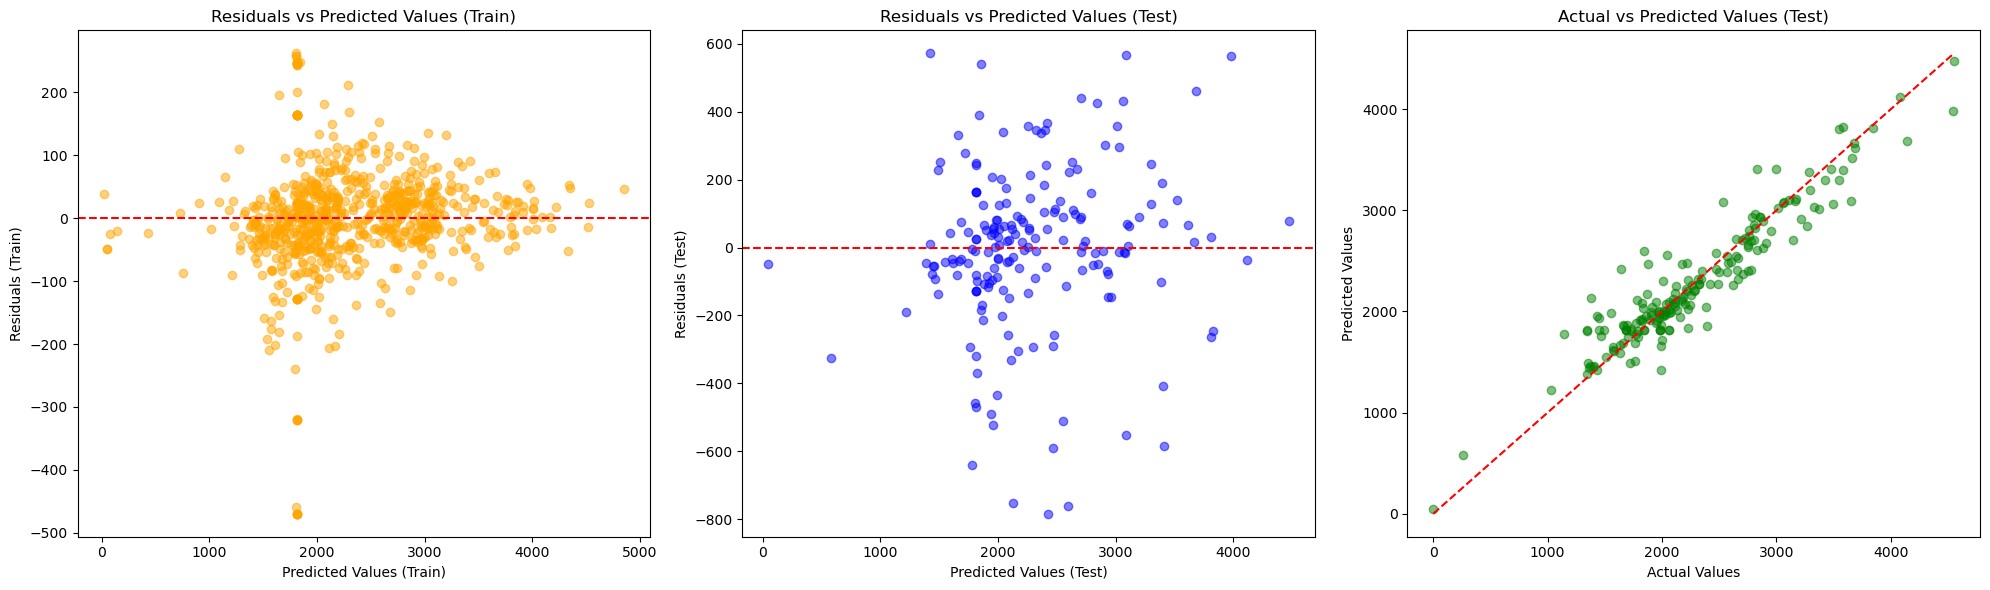

{'Model': 'CatBoost Regressor',
 'Training Time (s)': 18.71532154083252,
 'RMSE Train': 75.26547501211213,
 'RMSE Test': 241.15265299426554,
 'R2 Train': 0.9887201067723334,
 'R2 Test': 0.8855817127873711,
 'MAE Train': 45.37888978678015,
 'MAE Test': 170.89076870682027,
 'Mean Residual Train': -0.024328630580217496,
 'Mean Residual Test': -2.601031027422907,
 'MAPE Train': 805586147163213.1,
 'MAPE Test': 1166441956865982.8}

In [43]:
cb_results = evaluate_model(CatBoostRegressor(random_state=42, silent=True), 'CatBoost Regressor')
results.append(cb_results)
cb_results

## LightGBM

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000777 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2888
[LightGBM] [Info] Number of data points in the train set: 500, number of used features: 22
[LightGBM] [Info] Start training from score 2329.376000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

<Figure size 1400x600 with 0 Axes>

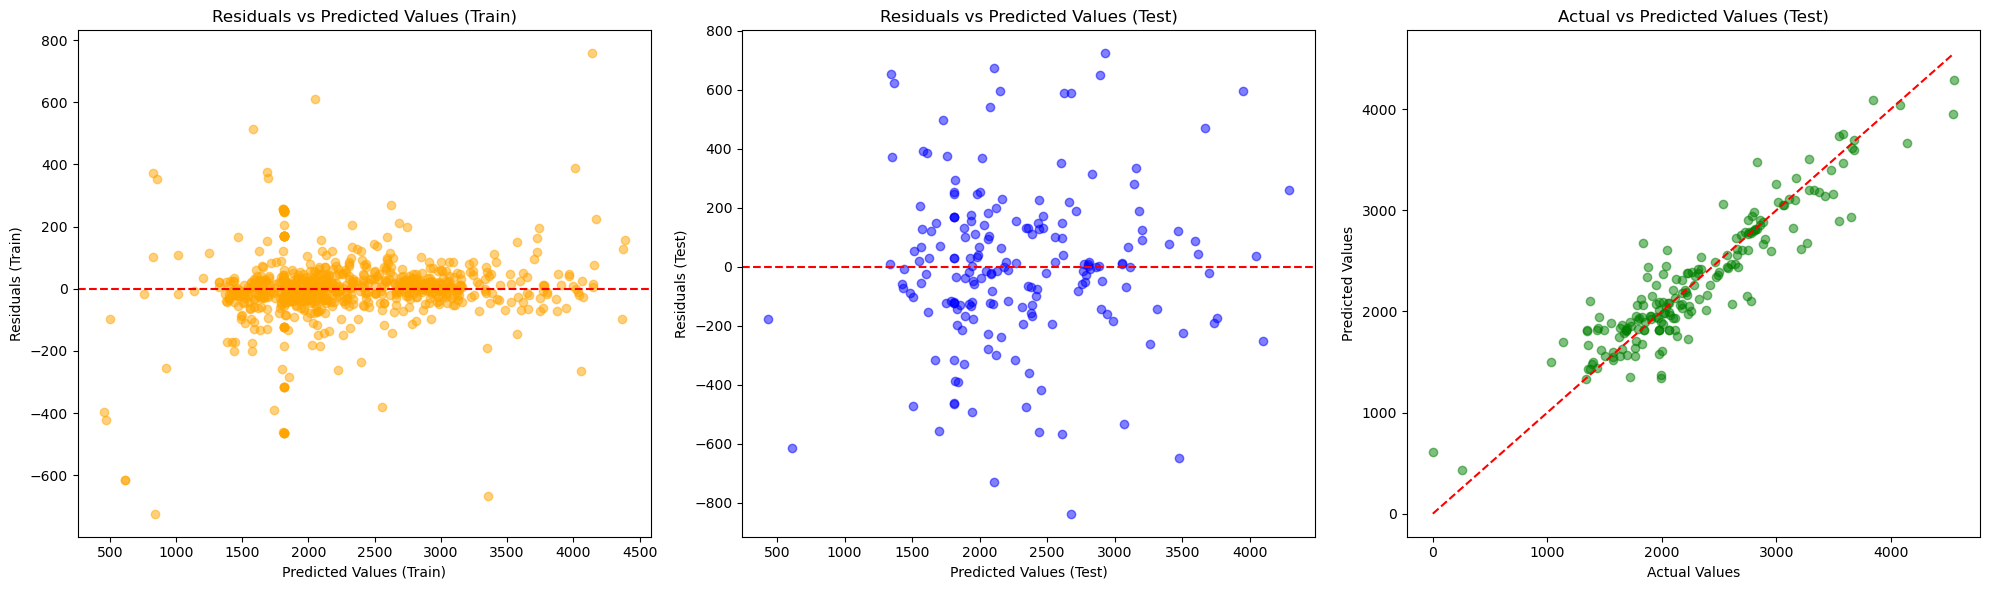

{'Model': 'LightGBM Regressor',
 'Training Time (s)': 1.4536170959472656,
 'RMSE Train': 125.01212343220341,
 'RMSE Test': 267.89468882792397,
 'R2 Train': 0.9692592638481589,
 'R2 Test': 0.8587984184233355,
 'MAE Train': 73.85679912272622,
 'MAE Test': 194.2584486291222,
 'Mean Residual Train': 4.532468723404946e-08,
 'Mean Residual Test': 0.7291327731860423,
 'MAPE Train': 1.0586519314851606e+16,
 'MAPE Test': 1.4710159325484424e+16}

In [44]:
lgbm_results = evaluate_model(LGBMRegressor(random_state=42), 'LightGBM Regressor')
results.append(lgbm_results)
lgbm_results

## ExtraTrees

<Figure size 1400x600 with 0 Axes>

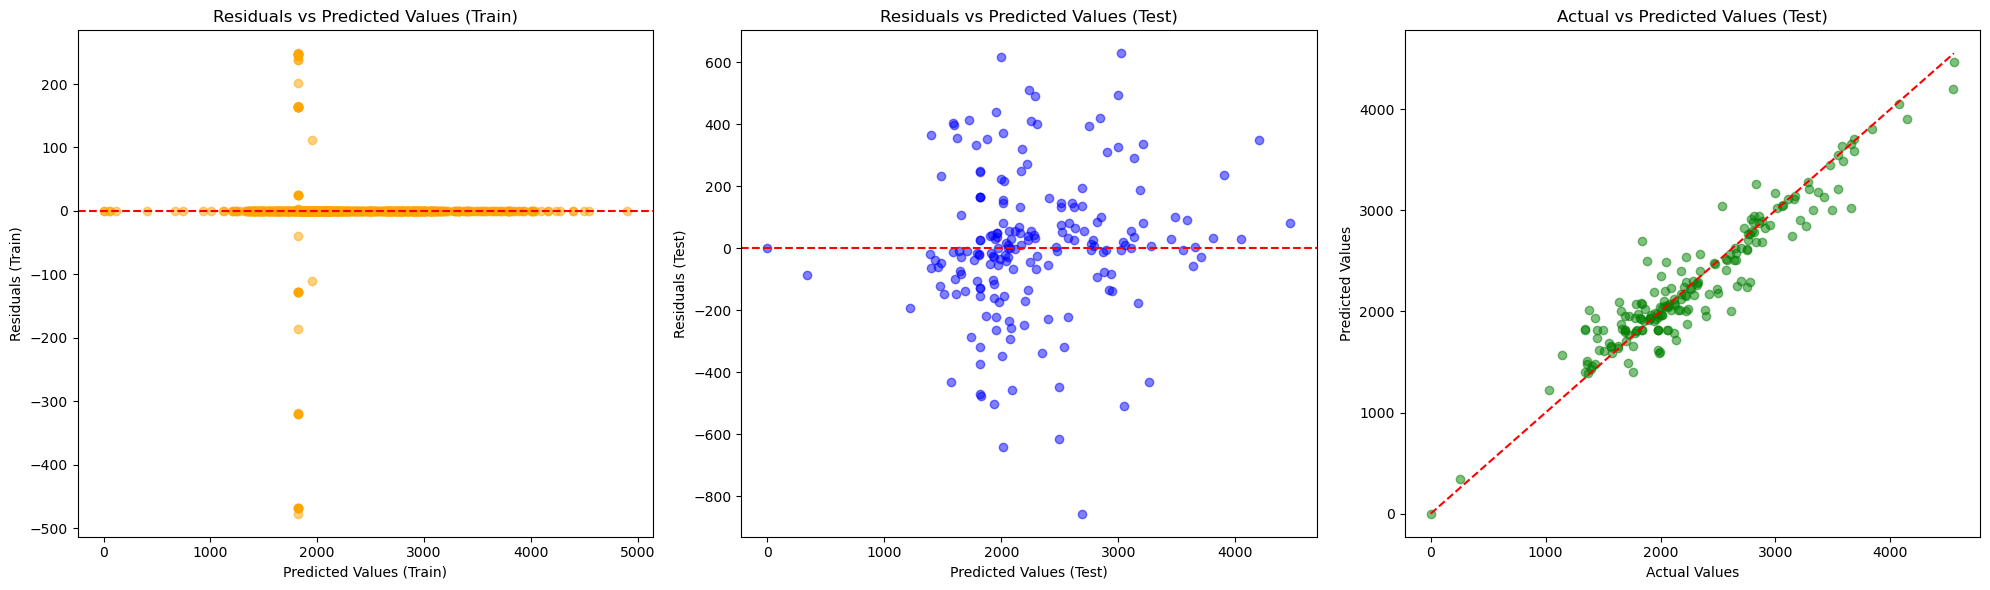

{'Model': 'Extra Trees Regressor',
 'Training Time (s)': 2.995929479598999,
 'RMSE Train': 60.48917621538144,
 'RMSE Test': 230.70435140994798,
 'R2 Train': 0.9926124417549117,
 'R2 Test': 0.8952816173248417,
 'MAE Train': 13.2202850103423,
 'MAE Test': 161.58885214307736,
 'Mean Residual Train': -2.1707979399839864e-13,
 'Mean Residual Test': 8.31050030835625,
 'MAPE Train': 0.007824489445090134,
 'MAPE Test': 0.07931455278859016}

In [45]:
et_results = evaluate_model(ExtraTreesRegressor(random_state=42), 'Extra Trees Regressor')
results.append(et_results)
et_results

## Hasil

In [46]:
results_df = pd.DataFrame(results)

results_df['RMSE Difference'] = results_df['RMSE Test'] - results_df['RMSE Train']
results_df['R2 Difference'] = results_df['R2 Test'] - results_df['R2 Train']
results_df['MAE Difference'] = results_df['MAE Test'] - results_df['MAE Train']
results_df['MAPE Difference'] = results_df['MAPE Test'] - results_df['MAPE Train']

# Menentukan urutan kolom yang diinginkan
columns_order = [
    'Model', 'Training Time (s)', 
    'RMSE Train', 'RMSE Test', 'RMSE Difference',
    'R2 Train', 'R2 Test', 'R2 Difference',
    'MAE Train', 'MAE Test', 'MAE Difference',
    'Mean Residual Train', 'Mean Residual Test',
    'MAPE Train', 'MAPE Test', 'MAPE Difference'
]

# Mengatur urutan kolom dan mengurutkan hasil berdasarkan beberapa metrik
results_df = results_df[columns_order].sort_values(
    by=['RMSE Test', 'RMSE Train', 'RMSE Difference'],
    ascending=[True, True, True]
)

pd.options.display.float_format = '{:.4f}'.format
# Tampilkan DataFrame hasil
results_df

Model  Training Time (s)  RMSE Train  RMSE Test  \
12     Extra Trees Regressor             2.9959     60.4892   230.7044   
10        CatBoost Regressor            18.7153     75.2655   241.1527   
0              Random Forest             5.1657    123.1600   256.9289   
7          Gradient Boosting             2.9525    147.5155   265.8171   
11        LightGBM Regressor             1.4536    125.0121   267.8947   
6                    XGBoost             3.0409     61.4755   284.7409   
2                      Ridge             0.9772    325.0981   327.0748   
3                      Lasso             0.8673    317.3149   327.3751   
9             Bayesian Ridge             1.0192    310.7692   327.7362   
5              Decision Tree             0.9371     60.4892   329.8193   
1          Linear Regression             0.8284    309.6832   330.9930   
4                Elastic Net             0.8370    449.8341   457.6624   
8   Support Vector Regressor             1.1795    715.8074   710.4952   

    RMSE Difference  R2 Train  R2 Test  R2 Difference  MAE Train  MAE Test  \
12         170.2152    0.9926   0.8953        -0.0973    13.2203  161.5889   
10         165.8872    0.9887   0.8856        -0.1031    45.3789  170.8908   
0          133.7689    0.9699   0.8701        -0.0998    78.8837  180.0603   
7          118.3017    0.9572   0.8610        -0.0962   109.7786  195.2618   
11         142.8826    0.9693   0.8588        -0.1105    73.8568  194.2584   
6          223.2654    0.9923   0.8405        -0.1518    15.0670  191.6289   
2            1.9767    0.7924   0.7895        -0.0029   243.3789  247.4605   
3           10.0602    0.8022   0.7891        -0.0130   239.8582  246.7049   
9           16.9670    0.8103   0.7887        -0.0216   235.7684  249.6776   
5          269.3301    0.9926   0.7860        -0.2066    13.2203  208.4438   
1           21.3098    0.8116   0.7844        -0.0271   235.3459  252.3176   
4            7.8283    0.6028   0.5879        -0.0149   363.4502  373.4216   
8           -5.3121   -0.0055   0.0068         0.0123   548.5333  530.6508   

    MAE Difference  Mean Residual Train  Mean Residual Test  \
12        148.3686              -0.0000              8.3105   
10        125.5119              -0.0243             -2.6010   
0         101.1766              -2.9454             11.6268   
7          85.4832               0.0000              8.5587   
11        120.4016               0.0000              0.7291   
6         176.5619              -0.0092             -2.1510   
2           4.0816              -0.0000              5.6464   
3           6.8466              -0.0000             -0.6240   
9          13.9092              -0.0000             -6.6769   
5         195.2236              -0.0000              8.3603   
1          16.9717              -0.0000             -9.1956   
4           9.9713              -0.0000             18.7721   
8         -17.8825             168.3856            153.1478   

               MAPE Train              MAPE Test        MAPE Difference  
12                 0.0078                 0.0793                 0.0715  
10   805586147163213.1250  1166441956865982.7500   360855809702769.6250  
0   6798144635053768.0000  7533468142635498.0000   735323507581730.0000  
7   5711800928693021.0000 12807832069527140.0000  7096031140834119.0000  
11 10586519314851606.0000 14710159325484424.0000  4123640010632818.0000  
6     26127598894191.2070   152399820948850.4688   126272222054659.2656  
2  22029036174437152.0000 43084951421054904.0000 21055915246617752.0000  
3  20772948985712520.0000 41556071987881688.0000 20783123002169168.0000  
9  19382774539616564.0000 38306252424875872.0000 18923477885259308.0000  
5                  0.0078                 0.0986                 0.0908  
1  18605079001903796.0000 37405101513051752.0000 18800022511147956.0000  
4  23671881036268884.0000 47930726333107136.0000 24258845296838252.0000  
8  25480318358388916.0000 49981736116381120.0000

In [47]:
# results_df = pd.DataFrame(results)

# # Sesuaikan nama kolom dengan hasil dari evaluate_model
# results_df['RMSE Difference'] = results_df['Test RMSE'] - results_df['Train RMSE']
# results_df['R2 Difference'] = results_df['Test R2'] - results_df['Train R2']
# results_df['MAE Difference'] = results_df['Test MAE'] - results_df['Train MAE']
# results_df['MAPE Difference'] = results_df['Test MAPE'] - results_df['Train MAPE']

# columns_order = ['Model', 'Training Time (s)', 
#                  'Train RMSE', 'Test RMSE', 'RMSE Difference',
#                  'Train R2', 'Test R2', 'R2 Difference',
#                  'Train MAE', 'Test MAE', 'MAE Difference', 
#                  'Residual Mean Train', 'Residual Mean Test',
#                  'Train MAPE', 'Test MAPE', 'MAPE Difference']

# results_df = results_df[columns_order].sort_values(by=['Test RMSE', 'Train RMSE', 'RMSE Difference'], ascending=[True, True, True])

# results_df

# Model: Tuning

In [48]:
from sklearn.model_selection import GridSearchCV

In [49]:
results = []

## Linear Regression (no tuning needed)

<Figure size 1400x600 with 0 Axes>

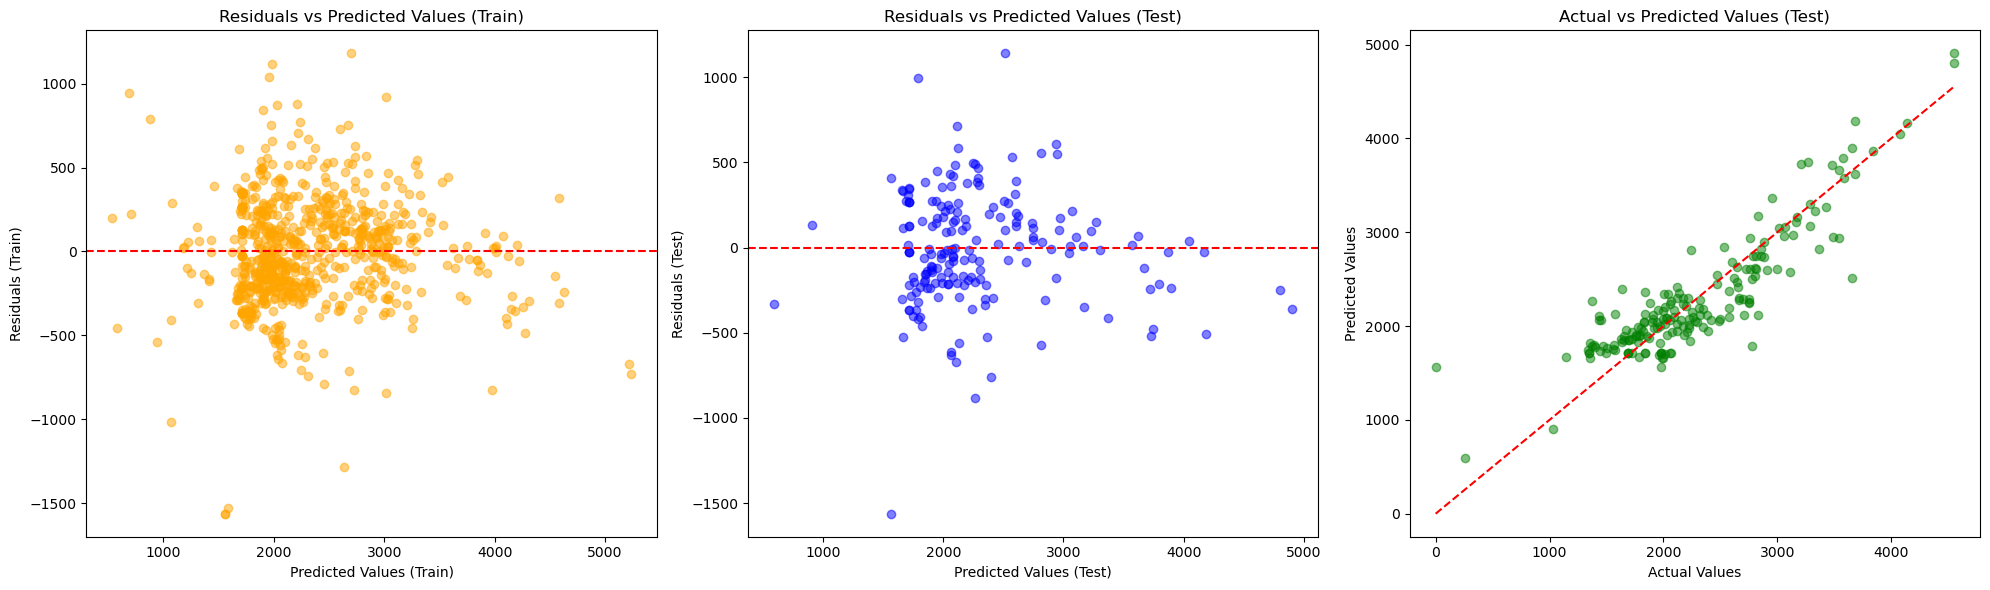

In [50]:
results.append(evaluate_model(LinearRegression(), 'Linear Regression'))

## Ridge

c:\Users\Asty\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Asty\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Asty\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Asty\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


<Figure size 1400x600 with 0 Axes>

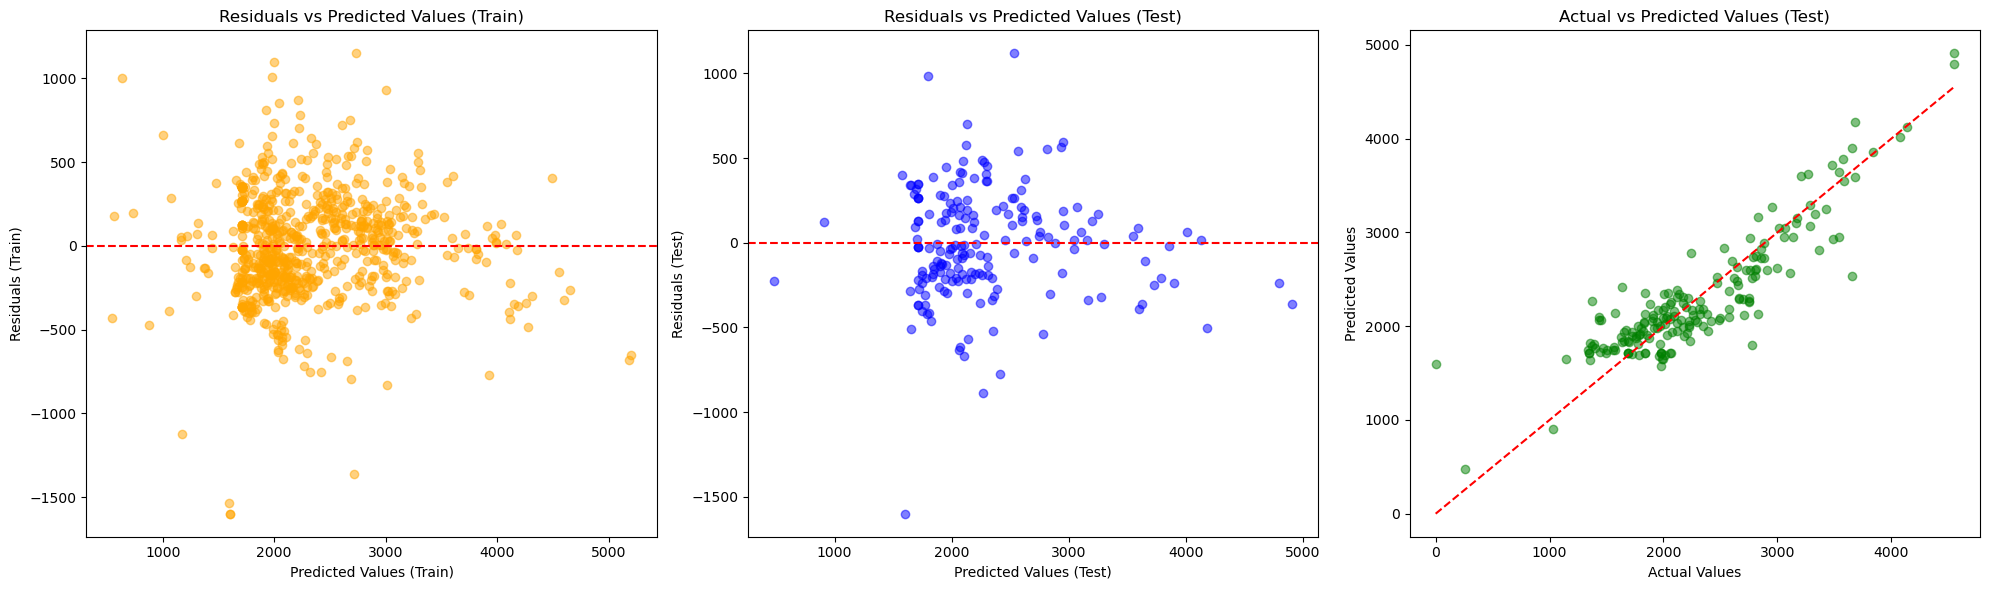

In [51]:
ridge_params = {
    'alpha': [0.1, 1.0, 10.0],
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'saga'] 
}
ridge_model = GridSearchCV(Ridge(), ridge_params, scoring='neg_mean_absolute_error', cv=3)
ridge_model.fit(X_train, y_train)  # Fit model
results.append(evaluate_model(ridge_model.best_estimator_, 'Ridge'))

## Lasso

c:\Users\Asty\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.735e+07, tolerance: 2.636e+04
  model = cd_fast.enet_coordinate_descent(
c:\Users\Asty\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.703e+07, tolerance: 2.453e+04
  model = cd_fast.enet_coordinate_descent(
c:\Users\Asty\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.626e+07, tolerance: 

<Figure size 1400x600 with 0 Axes>

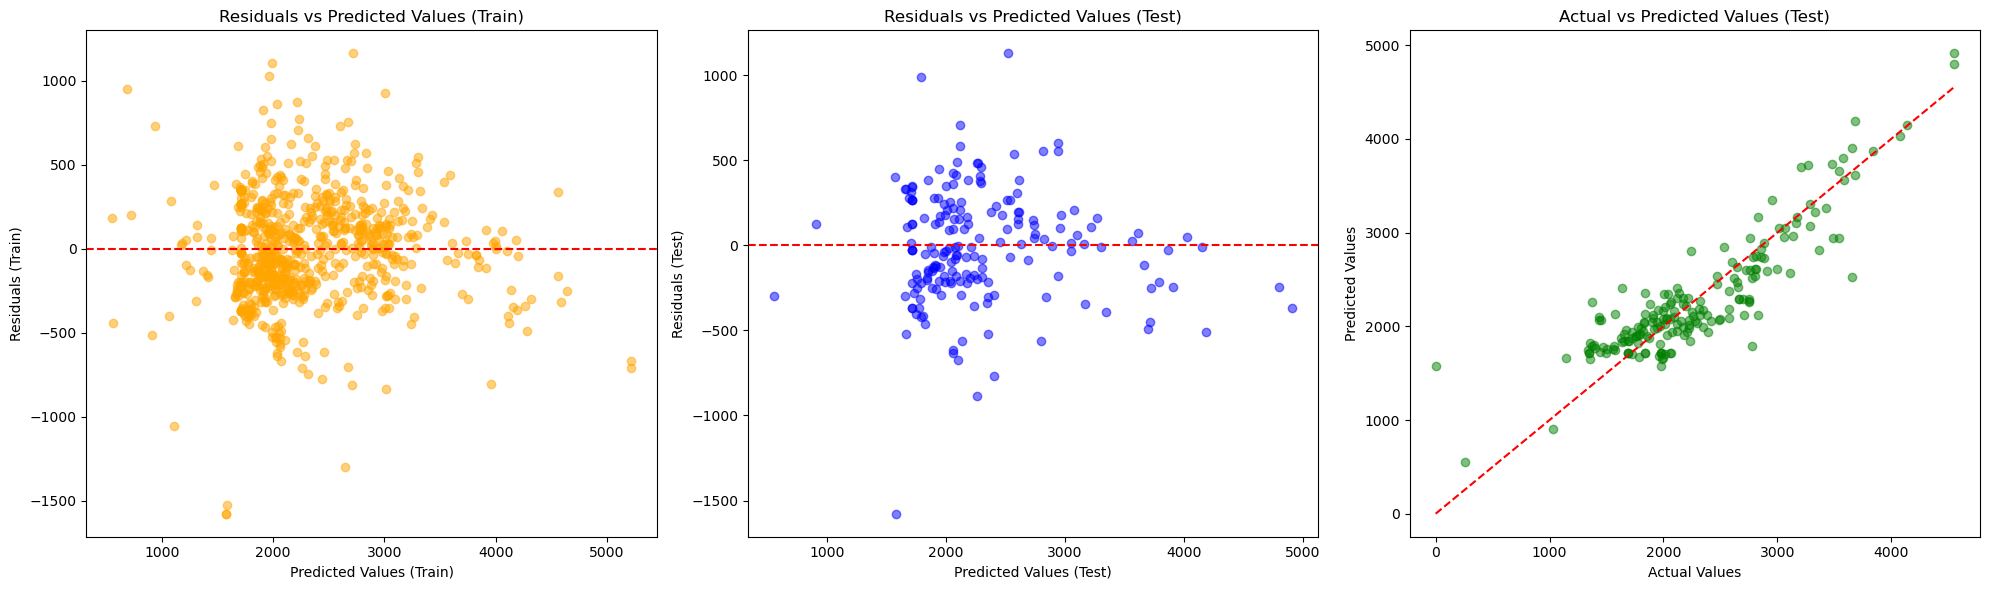

In [52]:
# Lasso dengan tuning
lasso_params = {
    'alpha': [0.1, 1.0, 10.0, None],  
    'fit_intercept': [True, False],   
    'max_iter': [1000, 5000]          
}
lasso_model = GridSearchCV(Lasso(), lasso_params, scoring='neg_mean_absolute_error', cv=3)
lasso_model.fit(X_train, y_train)  # Fit model
results.append(evaluate_model(lasso_model.best_estimator_, 'Lasso'))


## ElasticNet

c:\Users\Asty\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.844e+05, tolerance: 2.636e+04
  model = cd_fast.enet_coordinate_descent(
c:\Users\Asty\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.319e+05, tolerance: 2.453e+04
  model = cd_fast.enet_coordinate_descent(
c:\Users\Asty\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.327e+05, tolerance: 

<Figure size 1400x600 with 0 Axes>

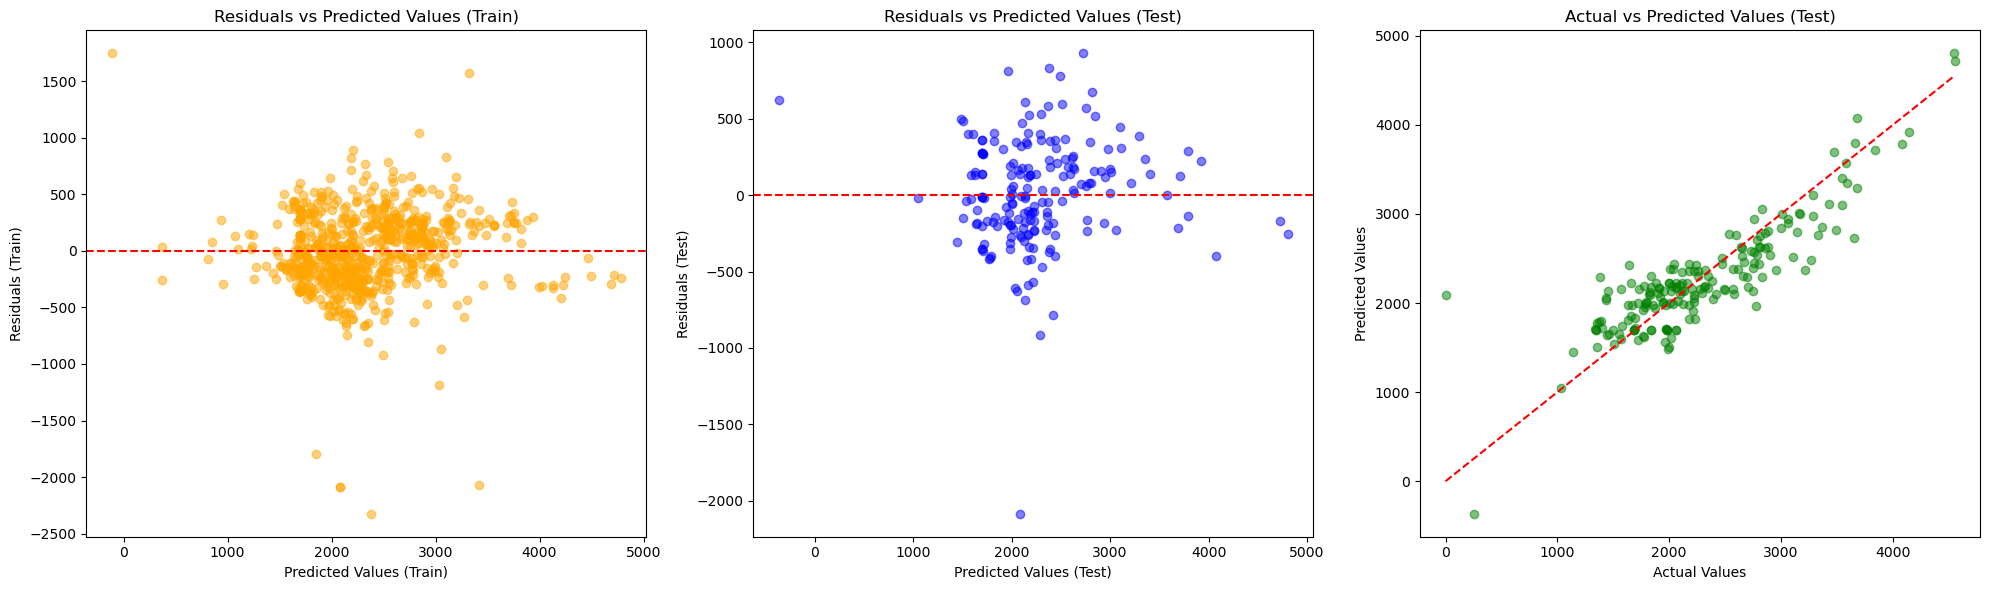

In [53]:
elastic_params = {
    'alpha': [0.1, 1.0, 10.0, None],
    'l1_ratio': [0.1, 0.5, 0.9],
    'fit_intercept': [True, False],
    'max_iter': [1000, 5000],
    'tol': [1e-4, 1e-3]
}
elastic_model = GridSearchCV(ElasticNet(), elastic_params, scoring='neg_mean_absolute_error', cv=3)
elastic_model.fit(X_train, y_train)  # Fit model
results.append(evaluate_model(elastic_model.best_estimator_, 'Elastic Net'))

## Decision Tree

c:\Users\Asty\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
108 fits failed out of a total of 324.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
108 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Asty\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Asty\anaconda3\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\Asty\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\Asty\anaconda3\Lib\site-packages\sk

<Figure size 1400x600 with 0 Axes>

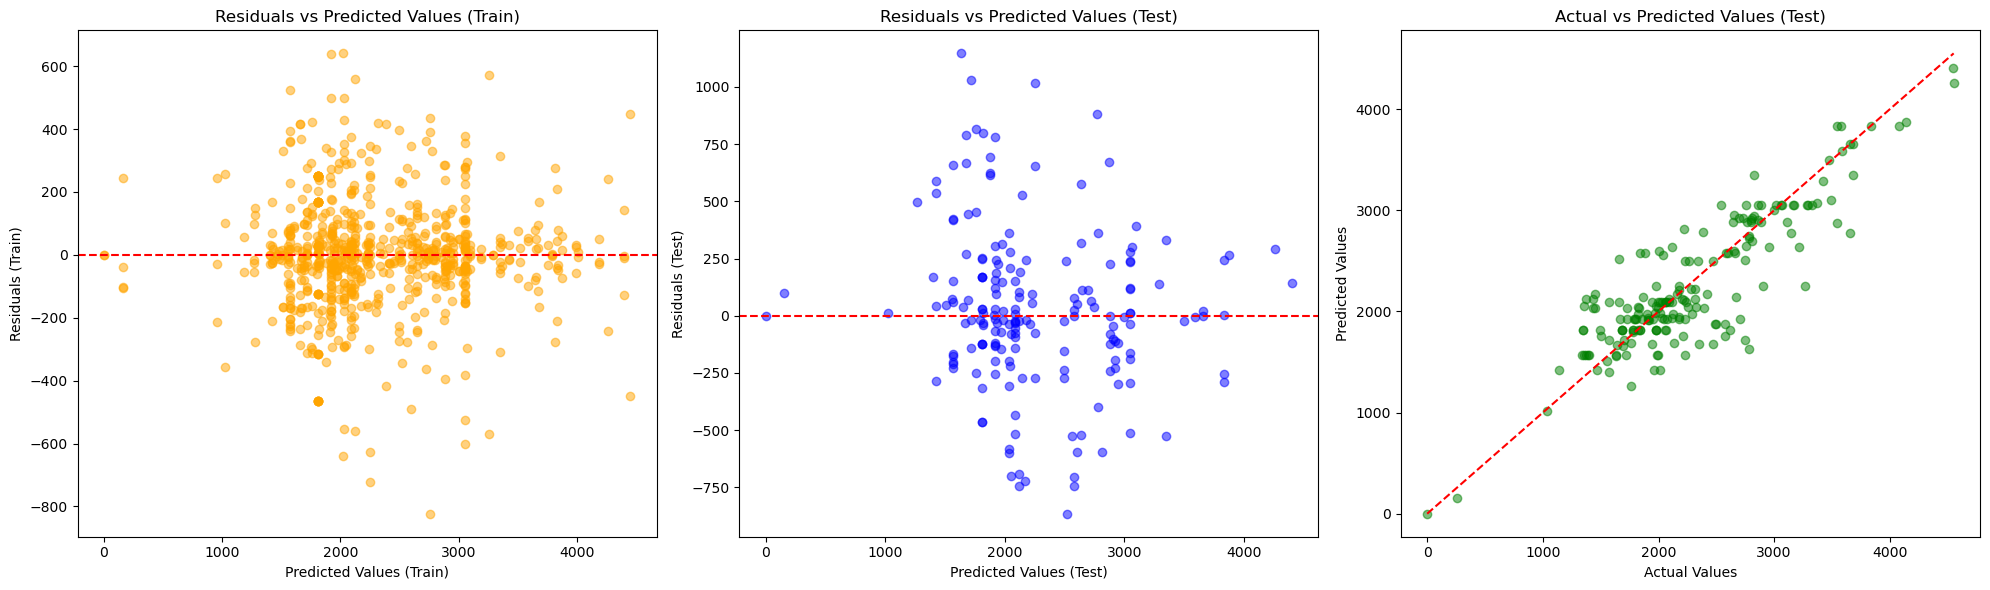

In [54]:
# Decision Tree dengan tuning
dt_params = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}
dt_model = GridSearchCV(DecisionTreeRegressor(), dt_params, scoring='neg_mean_absolute_error', cv=3)
dt_model.fit(X_train, y_train)  # Fit model
results.append(evaluate_model(dt_model.best_estimator_, 'Decision Tree'))

## XGBoost

<Figure size 1400x600 with 0 Axes>

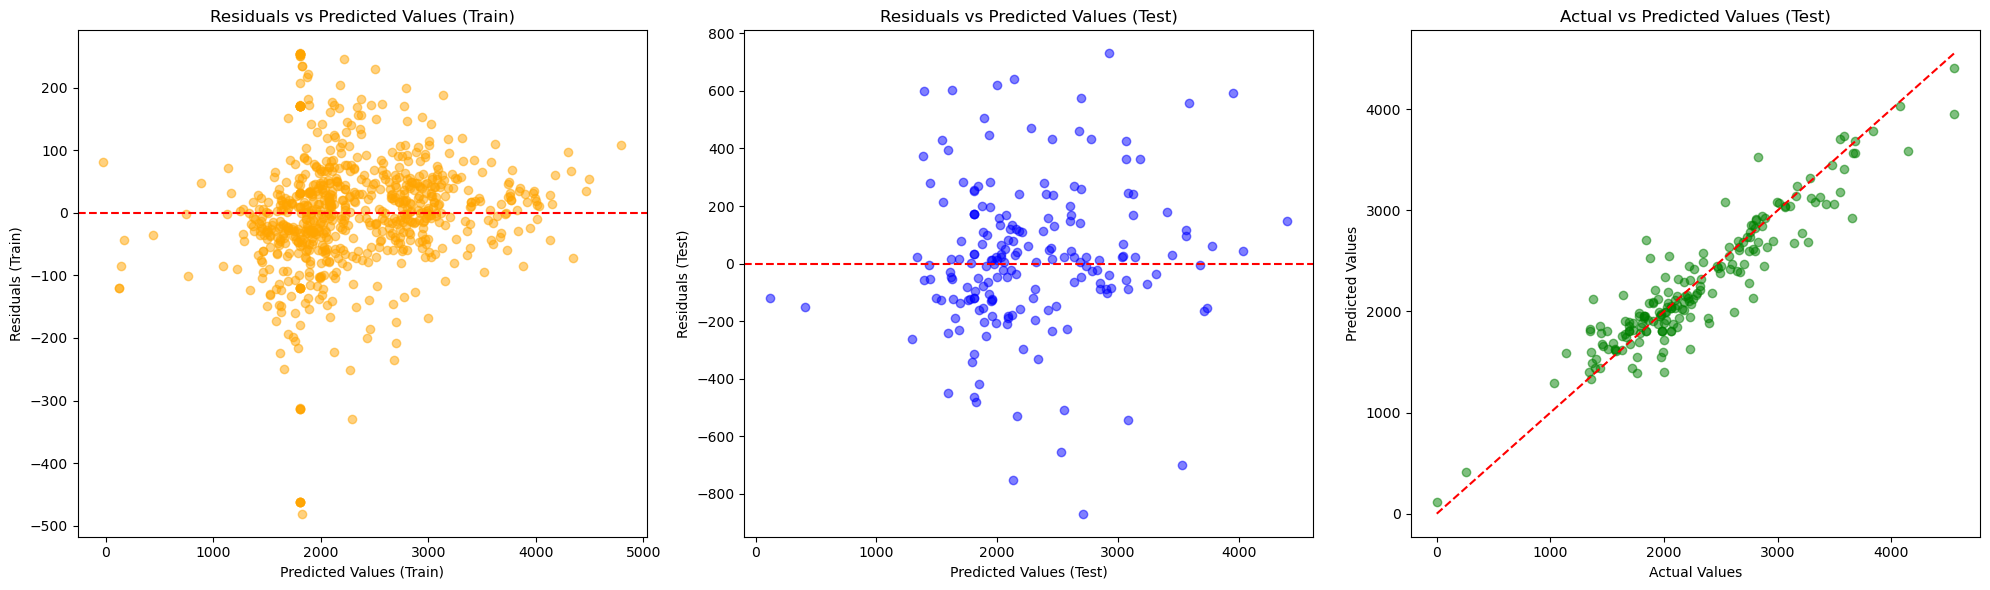

In [55]:
xgb_params = {
    'n_estimators': [50, 100],        
    'max_depth': [3, 5],               
    'learning_rate': [0.01, 0.1, 0.2], 
    'subsample': [0.8, 1.0]            # Proporsi data yang digunakan untuk setiap pohon
}
xgb_model = GridSearchCV(XGBRegressor(), xgb_params, scoring='neg_mean_absolute_error', cv=3)
xgb_model.fit(X_train, y_train)  # Fit model
results.append(evaluate_model(xgb_model.best_estimator_, 'XGBoost'))


## Gradient Boosting

<Figure size 1400x600 with 0 Axes>

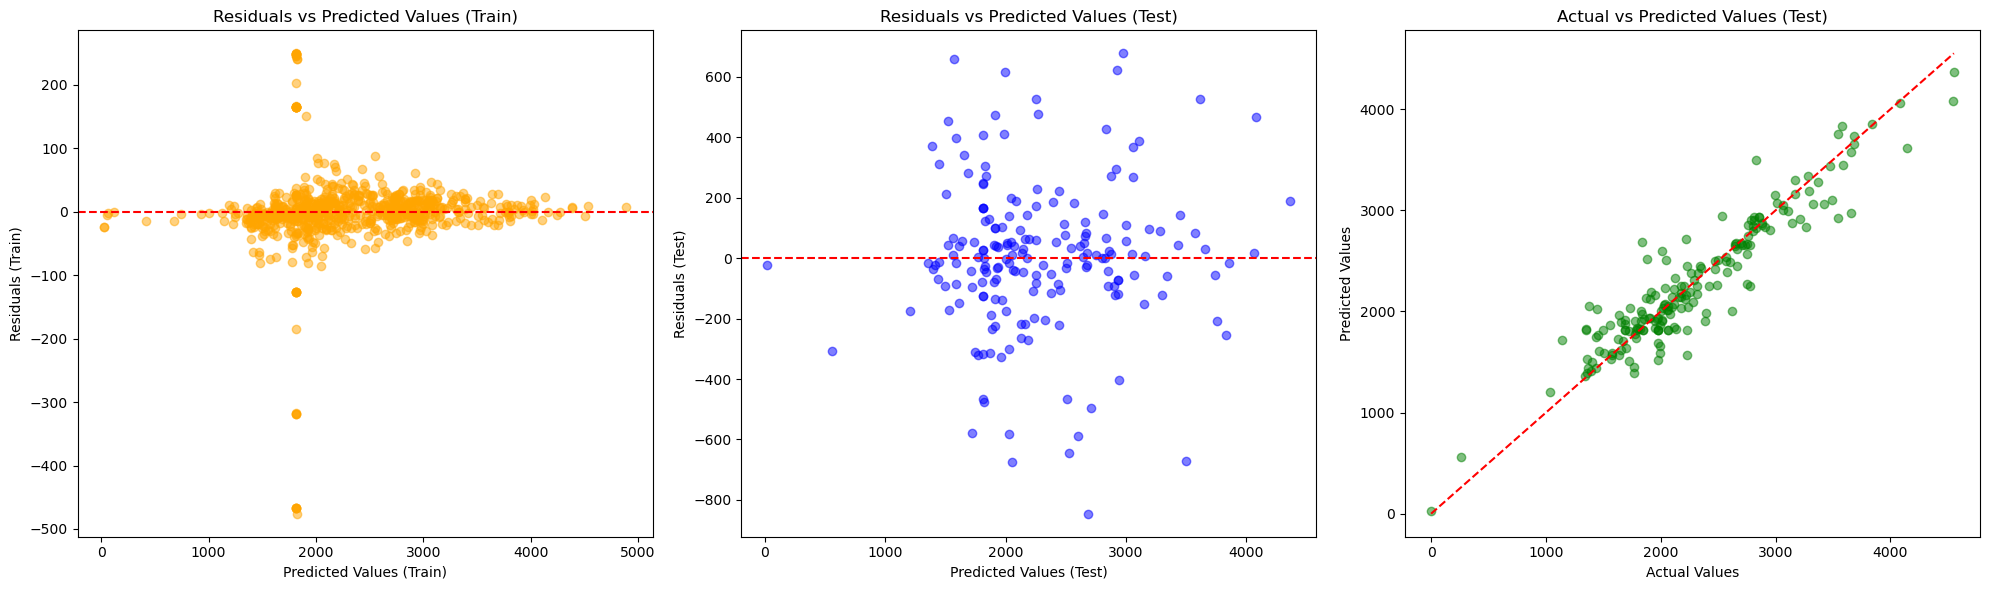

In [56]:
gb_params = {
    'n_estimators': [100, 200], 
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5]
}
gb_model = GridSearchCV(GradientBoostingRegressor(), gb_params, scoring='neg_mean_absolute_error', cv=3)
gb_model.fit(X_train, y_train)  # Fit model
results.append(evaluate_model(gb_model.best_estimator_, 'Gradient Boosting'))

## SVR

<Figure size 1400x600 with 0 Axes>

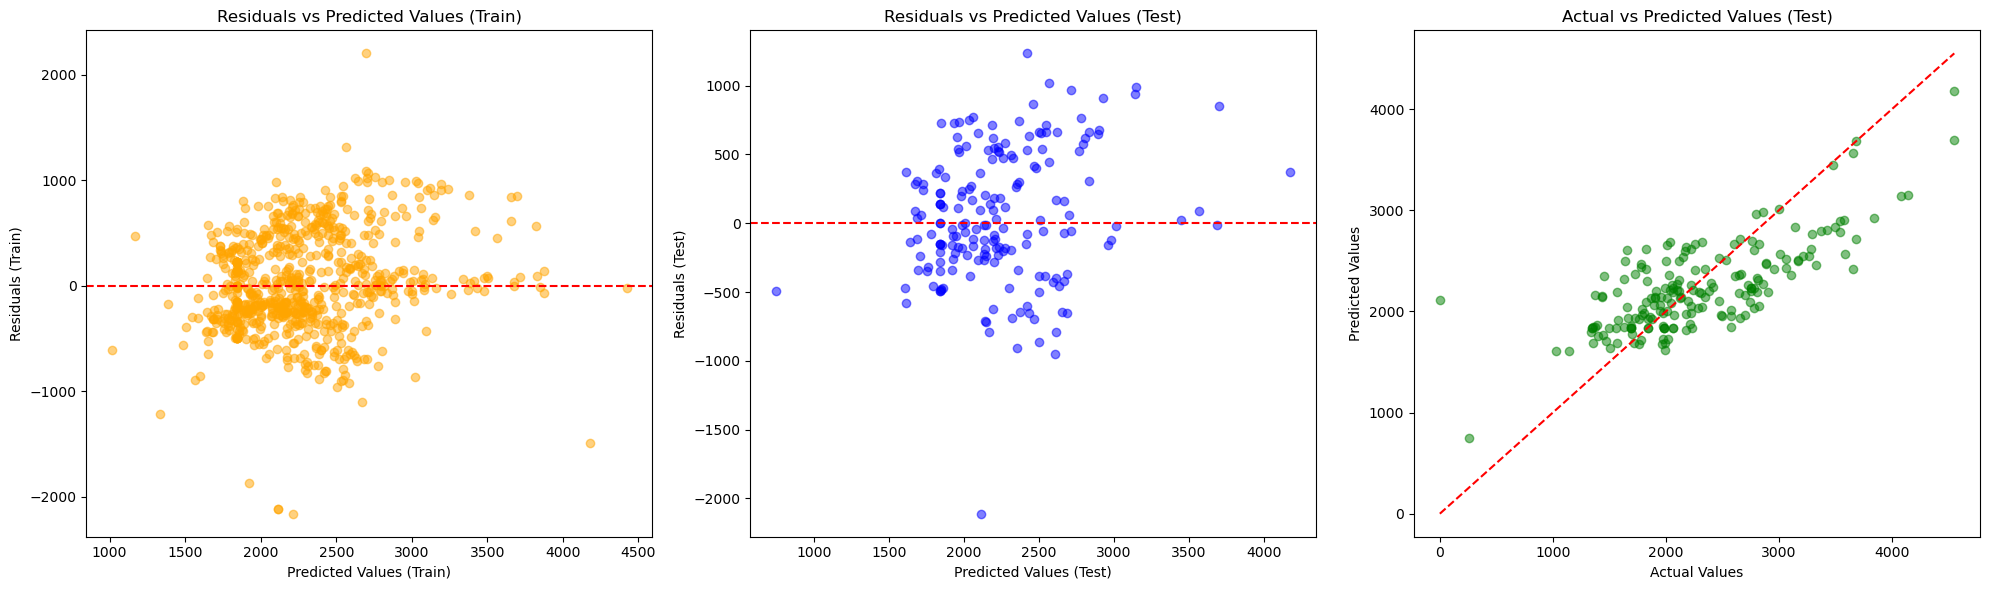

In [57]:
# SVR dengan tuning
svr_params = {
    'C': [0.1, 1.0],                    # Regularization parameter
    'epsilon': [0.1, 0.2],              # Margin of tolerance
    'kernel': ['linear', 'rbf','poly','sigmoid']
}
svr_model = GridSearchCV(SVR(), svr_params, scoring='neg_mean_absolute_error', cv=3)
svr_model.fit(X_train, y_train)  # Fit model
results.append(evaluate_model(svr_model.best_estimator_, 'SVR'))

## Bayesian Ridge

<Figure size 1400x600 with 0 Axes>

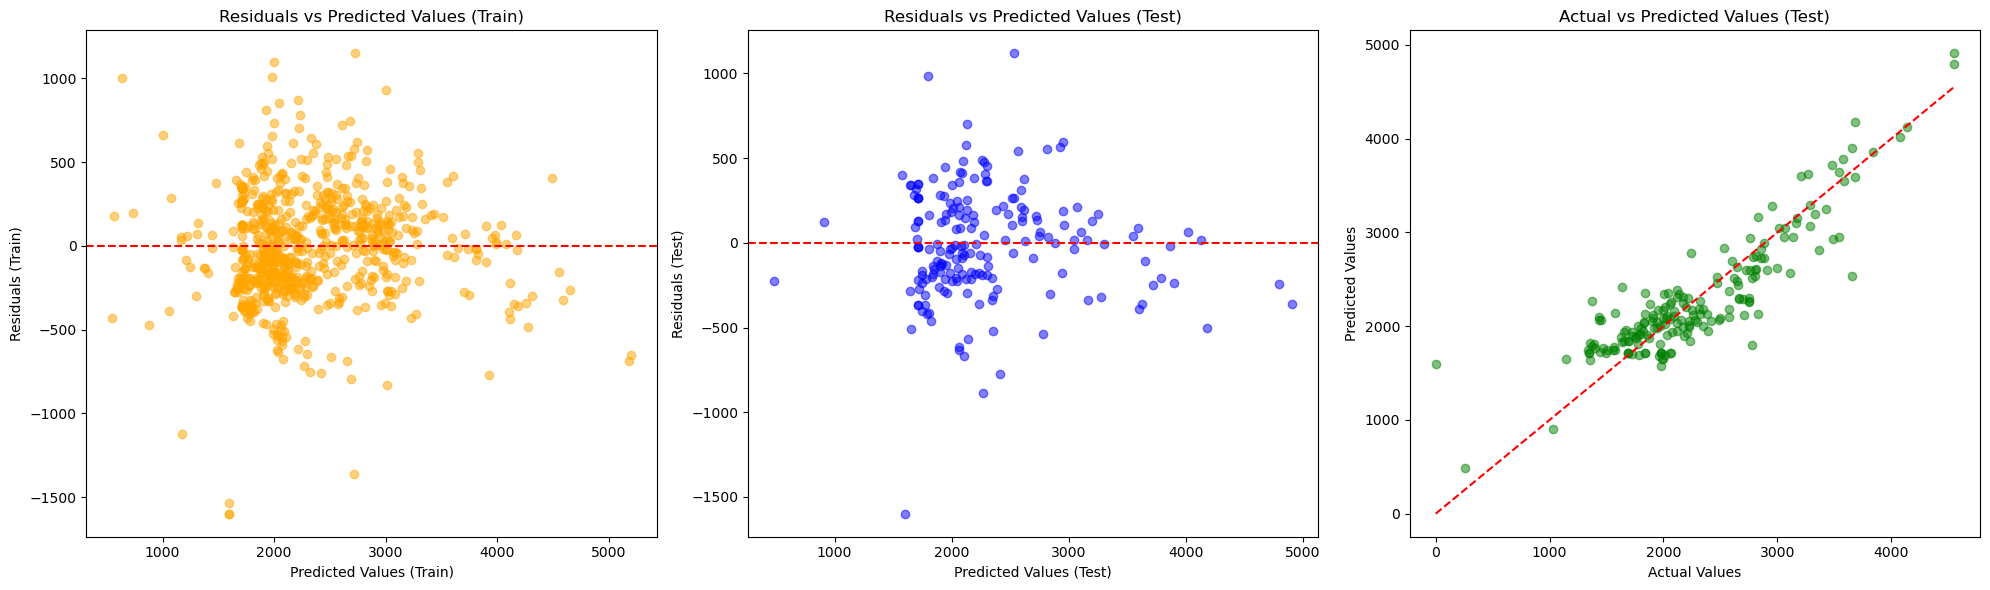

In [58]:
# Bayesian Ridge tanpa tuning
results.append(evaluate_model(BayesianRidge(), 'Bayesian Ridge'))

## CatBoost

<Figure size 1400x600 with 0 Axes>

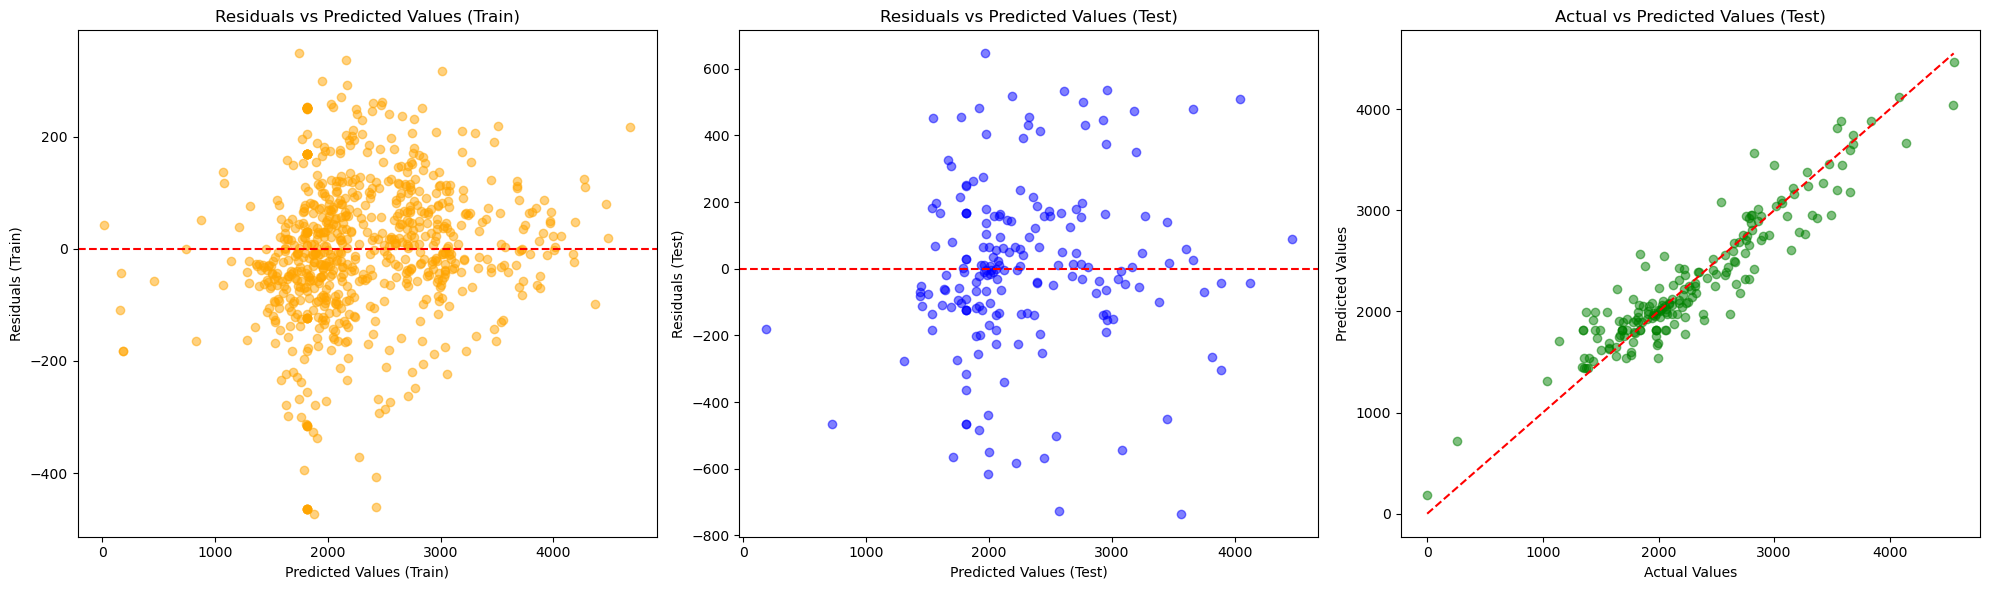

In [59]:
cat_params = {
    'depth': [None, 6, 8], 
    'iterations': [100, 200],
    'learning_rate': [0.01, 0.1],
    'l2_leaf_reg': [3, 5] 
}
cat_model = GridSearchCV(CatBoostRegressor(silent=True), cat_params, scoring='neg_mean_absolute_error', cv=3)
cat_model.fit(X_train, y_train)  # Fit model
results.append(evaluate_model(cat_model.best_estimator_, 'CatBoost'))

## LightGBM

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000197 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2883
[LightGBM] [Info] Number of data points in the train set: 500, number of used features: 22
[LightGBM] [Info] Start training from score 2299.142000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

<Figure size 1400x600 with 0 Axes>

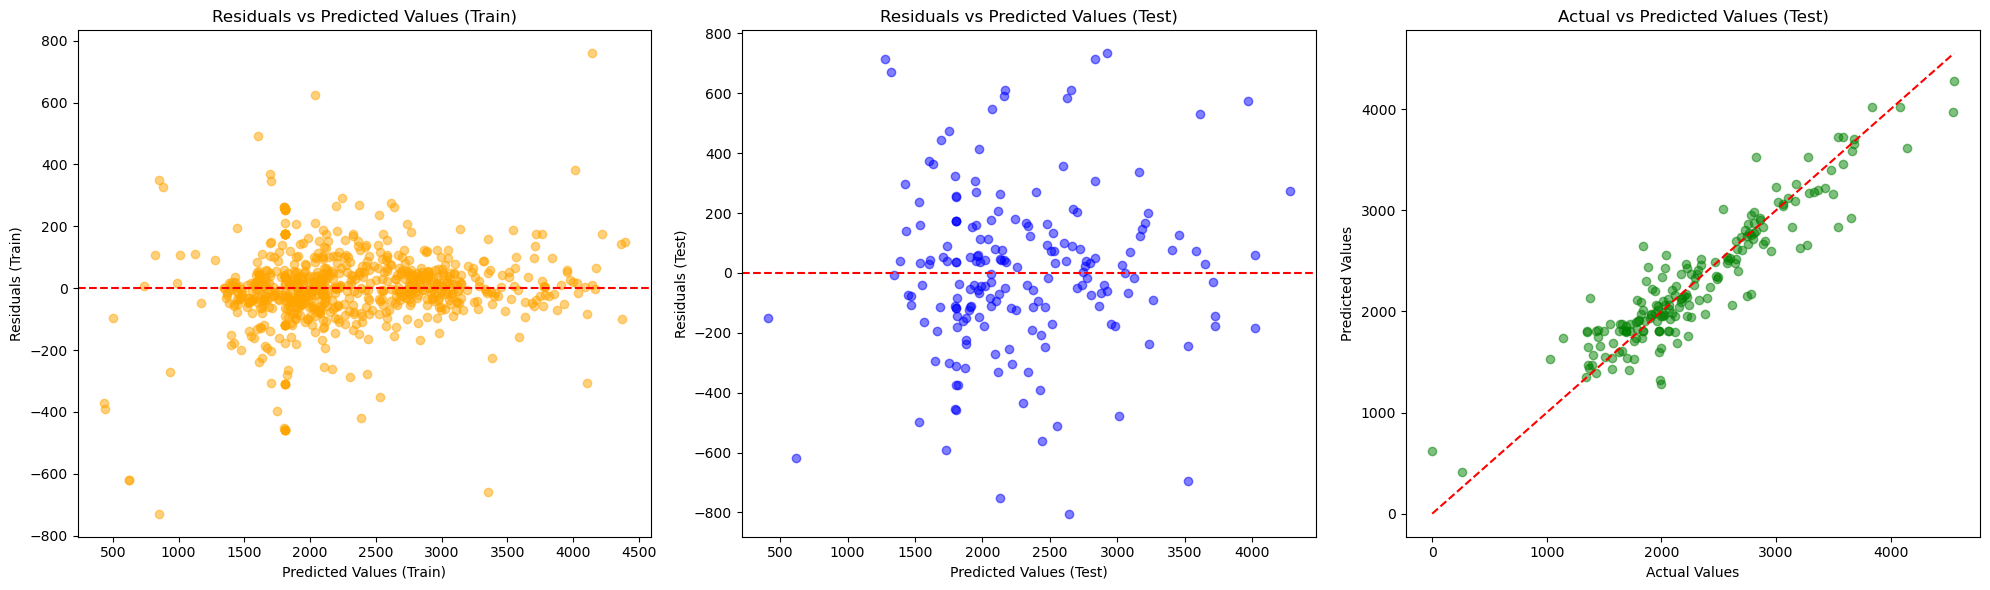

In [60]:
lgb_params = {
    'num_leaves': [31, 61],            
    'learning_rate': [0.1, 0.2],       
    'max_depth': [None, 5, 10]         
}

lgb_model = GridSearchCV(LGBMRegressor(), lgb_params, scoring='neg_mean_absolute_error', cv=3)
lgb_model.fit(X_train, y_train)  # Fit model
results.append(evaluate_model(lgb_model.best_estimator_, 'LightGBM'))


## Extra Trees

c:\Users\Asty\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
18 fits failed out of a total of 36.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
18 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Asty\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Asty\anaconda3\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\Asty\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\Asty\anaconda3\Lib\site-packages\sklea

<Figure size 1400x600 with 0 Axes>

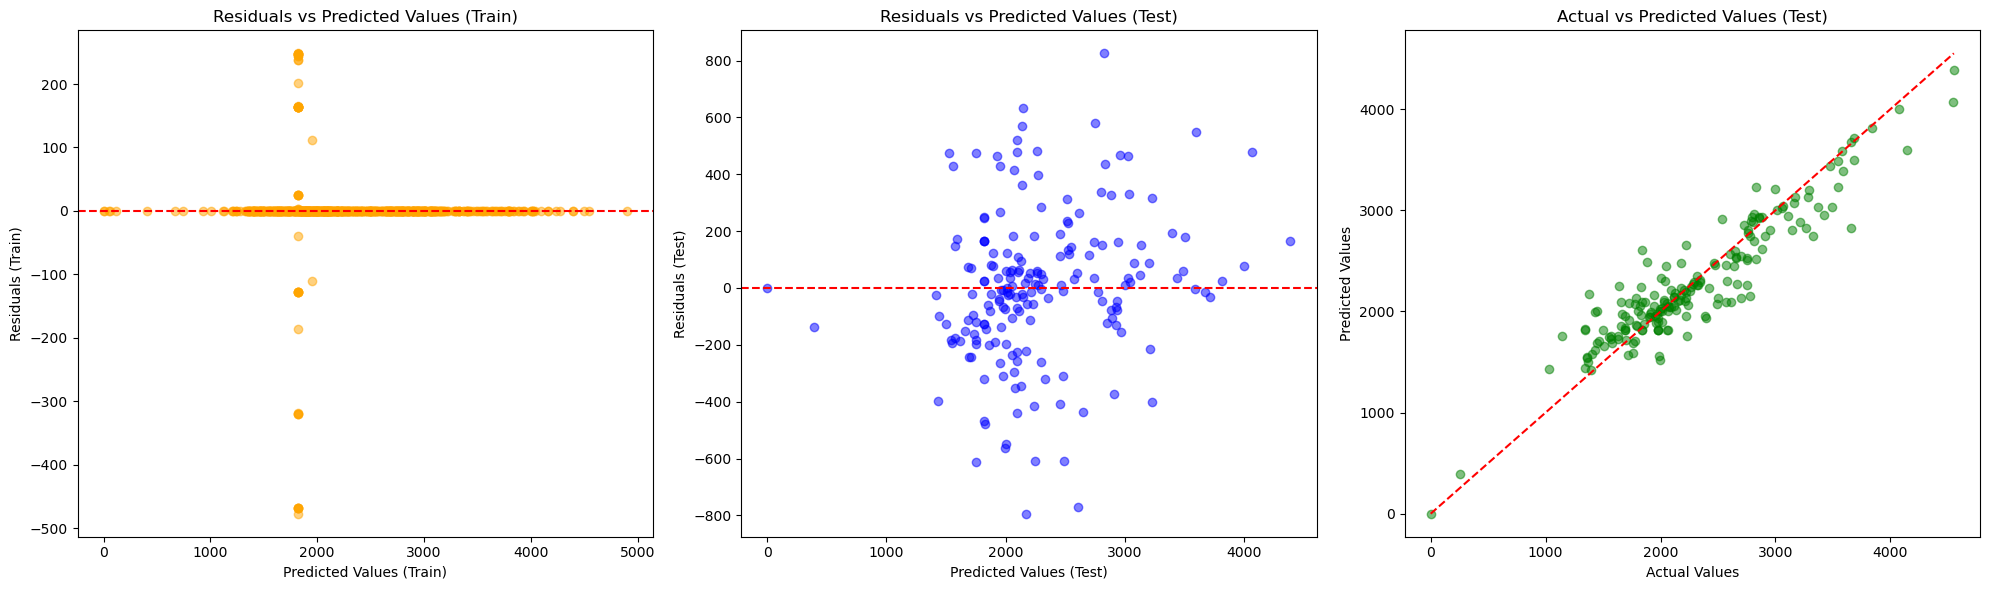

In [61]:
et_params = {
    'n_estimators': [50, 100], 
    'max_features': ['auto', 'sqrt'],
    'max_depth': [None, 10, 20]
}
et_model = GridSearchCV(ExtraTreesRegressor(), et_params, scoring='neg_mean_absolute_error', cv=3)
et_model.fit(X_train, y_train)  # Fit model
results.append(evaluate_model(et_model.best_estimator_, 'Extra Trees'))

## Hasil

In [62]:
results_df = pd.DataFrame(results)

results_df['RMSE Difference'] = results_df['RMSE Test'] - results_df['RMSE Train']
results_df['R2 Difference'] = results_df['R2 Test'] - results_df['R2 Train']
results_df['MAE Difference'] = results_df['MAE Test'] - results_df['MAE Train']
results_df['MAPE Difference'] = results_df['MAPE Test'] - results_df['MAPE Train']

results_df = results_df[columns_order].sort_values(by=['RMSE Test','RMSE Train','RMSE Difference'],ascending=[True,True,True])

results_df

Model  Training Time (s)  RMSE Train  RMSE Test  \
6   Gradient Boosting             6.4615     61.5762   248.3549   
9            CatBoost             4.5820    112.1311   252.5074   
5             XGBoost             1.9339     83.3877   256.9122   
11        Extra Trees             1.3762     60.4892   265.8790   
10           LightGBM             1.4535    129.3596   267.9399   
1               Ridge             0.7728    310.5116   327.7078   
8      Bayesian Ridge             0.9282    310.7692   327.7362   
2               Lasso             1.1259    309.7499   330.2451   
0   Linear Regression             0.8645    309.6832   330.9930   
3         Elastic Net             0.8425    347.4661   352.9382   
4       Decision Tree             0.8357    197.3447   354.0910   
7                 SVR             1.0343    490.9532   481.7573   

    RMSE Difference  R2 Train  R2 Test  R2 Difference  MAE Train  MAE Test  \
6          186.7787    0.9924   0.8786        -0.1137    21.6289  173.8229   
9          140.3763    0.9751   0.8746        -0.1006    81.3249  183.9062   
5          173.5245    0.9862   0.8701        -0.1161    53.0172  184.6007   
11         205.3899    0.9926   0.8609        -0.1317    13.2208  194.8789   
10         138.5803    0.9671   0.8588        -0.1084    80.8768  195.5503   
1           17.1962    0.8106   0.7887        -0.0219   235.6743  249.6506   
8           16.9670    0.8103   0.7887        -0.0216   235.7684  249.6776   
2           20.4952    0.8115   0.7854        -0.0261   235.3668  251.7617   
0           21.3098    0.8116   0.7844        -0.0271   235.3459  252.3176   
3            5.4721    0.7629   0.7549        -0.0080   259.3425  266.4806   
4          156.7463    0.9230   0.7533        -0.1696   128.1187  254.7758   
7           -9.1960    0.5271   0.5434         0.0163   383.4898  382.7055   

    MAE Difference  Mean Residual Train  Mean Residual Test  \
6         152.1940              -0.0000              5.1424   
9         102.5814              -0.3212              1.0489   
5         131.5835               0.1708             18.9119   
11        181.6581               0.0000              3.1707   
10        114.6735              -0.0000              2.9169   
1          13.9763              -0.0000             -6.6483   
8          13.9092              -0.0000             -6.6769   
2          16.3950               0.0000             -8.6141   
0          16.9717              -0.0000             -9.1956   
3           7.1381              -0.0000             17.9142   
4         126.6571              -0.0000             30.5894   
7          -0.7843              31.6200             52.5135   

               MAPE Train              MAPE Test         MAPE Difference  
6    180420457773227.9062   558940564416087.2500    378520106642859.3750  
9   3084342457681236.0000  4356726728378542.5000   1272384270697306.5000  
5   1924721044629848.7500  2868604453413387.0000    943883408783538.2500  
11                 0.0078                 0.0962                  0.0884  
10 10721826332258984.0000 14842629199869630.0000   4120802867610646.0000  
1  19256297133260884.0000 38317878202124200.0000  19061581068863316.0000  
8  19382774539616564.0000 38306252424875872.0000  18923477885259308.0000  
2  18813433225496052.0000 37791035247032136.0000  18977602021536084.0000  
0  18605079001903796.0000 37405101513051752.0000  18800022511147956.0000  
3  24520104397653772.0000 49965332253881824.0000  25445227856228052.0000  
4  10733858606538296.0000                 0.1208 -10733858606538296.0000  
7  24352592627782160.0000 50586194087582216.0000  26233601459800056.0000